In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp 
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
from mpl_toolkits import mplot3d
from pylab import rcParams
from scipy import stats

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
plt.style.use('ggplot')
rcParams["figure.figsize"] = 14, 7

In [ ]:
adWork_Raw_Url = "https://raw.githubusercontent.com/xpython21/Colab/main/Data/Raw_DimCustomers.csv"

In [ ]:
header_names = ["CustomerKey",	"Country",	"City",	"MaritalStatus",	"Age",	"Gender",	"YearlyIncome",	"TotalChildren",	"NumberChildrenAtHome",	"Education",	"Occupation",	"HouseOwnerFlag",	"NumberCarsOwned",	"VariousPurchaseFlag",	"AmountOrdersGroup",	"CommuteDistance",	"FirstToLastOrderDate",	"TotalOrders",	"TotalSalesAmount"]

In [ ]:
adWork_Raw = pd.read_csv(adWork_Raw_Url, delimiter=';', names=header_names)
adWork_Raw.head()

,CustomerKey,Country,City,MaritalStatus,Age,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,Education,Occupation,HouseOwnerFlag,NumberCarsOwned,VariousPurchaseFlag,AmountOrdersGroup,CommuteDistance,FirstToLastOrderDate,TotalOrders,TotalSalesAmount
0,11000,Australia,Rockhampton,Married,50,Male,"90000,00",2,0,Bachelors,Professional,1,0,1,1-10 Orders,1-2 Miles,835,8,"8248,99"
1,11001,Australia,Seaford,Single,45,Male,"60000,00",3,3,Bachelors,Professional,0,1,1,11-20 Orders,0-1 Miles,1060,11,"6383,88"
2,11002,Australia,Hobart,Married,50,Male,"60000,00",3,3,Bachelors,Professional,1,1,1,1-10 Orders,2-5 Miles,778,4,"8114,04"
3,11003,Australia,North Ryde,Single,48,Female,"70000,00",0,0,Bachelors,Professional,0,1,1,1-10 Orders,5-10 Miles,863,9,"8139,29"
4,11004,Australia,Wollongong,Single,42,Female,"80000,00",5,5,Bachelors,Professional,1,4,1,1-10 Orders,1-2 Miles,829,6,"8196,01"


In [ ]:
adWork_Raw.dtypes

CustomerKey              int64
Country                 object
City                    object
MaritalStatus           object
Age                      int64
Gender                  object
YearlyIncome            object
TotalChildren            int64
NumberChildrenAtHome     int64
Education               object
Occupation              object
HouseOwnerFlag           int64
NumberCarsOwned          int64
VariousPurchaseFlag      int64
AmountOrdersGroup       object
CommuteDistance         object
FirstToLastOrderDate     int64
TotalOrders              int64
TotalSalesAmount        object
dtype: object

In [ ]:
adWork_Raw['YearlyIncome'] = adWork_Raw['YearlyIncome'].apply(lambda x: x.replace(',', '.')).astype('float')
adWork_Raw['TotalSalesAmount'] = adWork_Raw['TotalSalesAmount'].apply(lambda x: x.replace(',', '.')).astype('float')

In [ ]:
adWork_Raw.dtypes

CustomerKey               int64
Country                  object
City                     object
MaritalStatus            object
Age                       int64
Gender                   object
YearlyIncome            float64
TotalChildren             int64
NumberChildrenAtHome      int64
Education                object
Occupation               object
HouseOwnerFlag            int64
NumberCarsOwned           int64
VariousPurchaseFlag       int64
AmountOrdersGroup        object
CommuteDistance          object
FirstToLastOrderDate      int64
TotalOrders               int64
TotalSalesAmount        float64
dtype: object

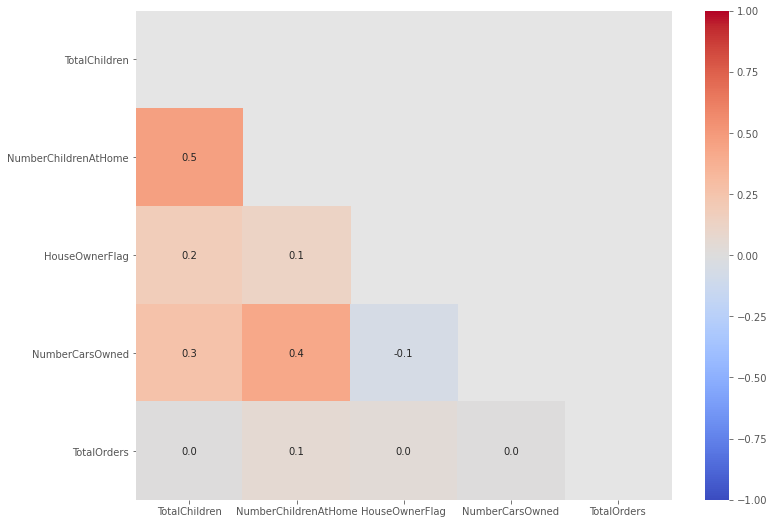

In [ ]:
# Generate correlation matrix heat map
corrfe = adWork_Raw[['TotalChildren', 'NumberChildrenAtHome', 'HouseOwnerFlag', 'NumberCarsOwned', 'TotalOrders']]

matrix = np.triu(corrfe.corr())

plt.figure(figsize=(12, 9))
sns.heatmap(corrfe.corr(), annot=True, fmt='.1f', vmin=-1, vmax=1, center=0, cmap='coolwarm', mask=matrix)

In [ ]:
adWork_Raw.groupby(by='AmountOrdersGroup')[['TotalOrders']].count()

,TotalOrders
AmountOrdersGroup,
1-10 Orders,18313
11-20 Orders,135
21-30 Orders,6
31-40 Orders,15
41-50 Orders,1
51-60 Orders,9
61+ Orders,5


In [ ]:
adWork_Raw[adWork_Raw['AmountOrdersGroup'] == '41-50 Orders']

,CustomerKey,Country,City,MaritalStatus,Age,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,Education,Occupation,HouseOwnerFlag,NumberCarsOwned,VariousPurchaseFlag,AmountOrdersGroup,CommuteDistance,FirstToLastOrderDate,TotalOrders,TotalSalesAmount
502,11502,Canada,Shawnee,Single,41,Male,40000.0,4,4,Partial College,Clerical,1,1,1,41-50 Orders,0-1 Miles,362,43,1026.29


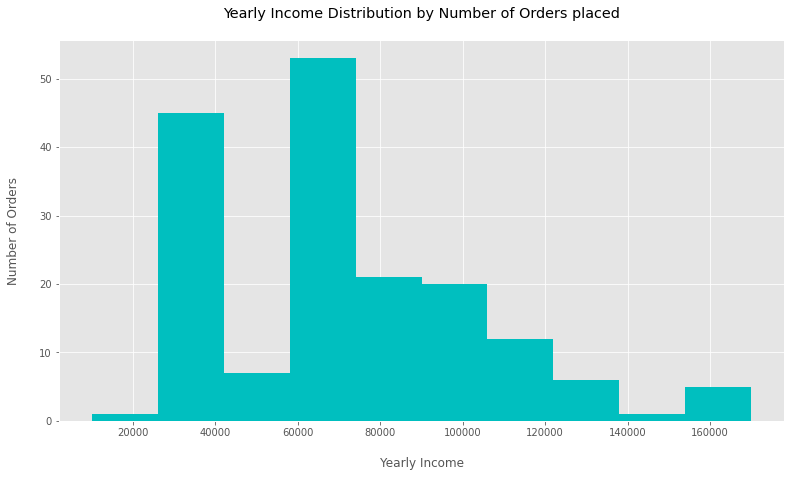

In [ ]:
plt.figure(figsize=(13, 7))

plt.hist(adWork_Raw.iloc[np.where(adWork_Raw['AmountOrdersGroup'] > '1-10 Orders')]['YearlyIncome'], histtype='barstacked', color='c')

plt.title('Yearly Income Distribution by Number of Orders placed\n')

plt.ylabel('Number of Orders\n')
plt.xlabel('\nYearly Income')

plt.show()

In [ ]:
adWork_Raw.columns

Index(['CustomerKey', 'Country', 'City', 'MaritalStatus', 'Age', 'Gender',
       'YearlyIncome', 'TotalChildren', 'NumberChildrenAtHome', 'Education',
       'Occupation', 'HouseOwnerFlag', 'NumberCarsOwned',
       'VariousPurchaseFlag', 'AmountOrdersGroup', 'CommuteDistance',
       'FirstToLastOrderDate', 'TotalOrders', 'TotalSalesAmount'],
      dtype='object')


personr = 0.09304007705584666; p = 8.033622896470537e-37


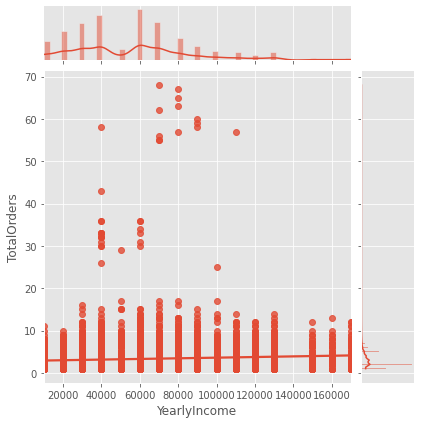

In [ ]:
pearson = stats.pearsonr(adWork_Raw['YearlyIncome'], adWork_Raw['TotalOrders'])
print('\npersonr = {}; p = {}'. format(pearson[0], pearson[1]))

j = sns.jointplot(x="YearlyIncome", y="TotalOrders", data=adWork_Raw, kind="reg")
plt.show()

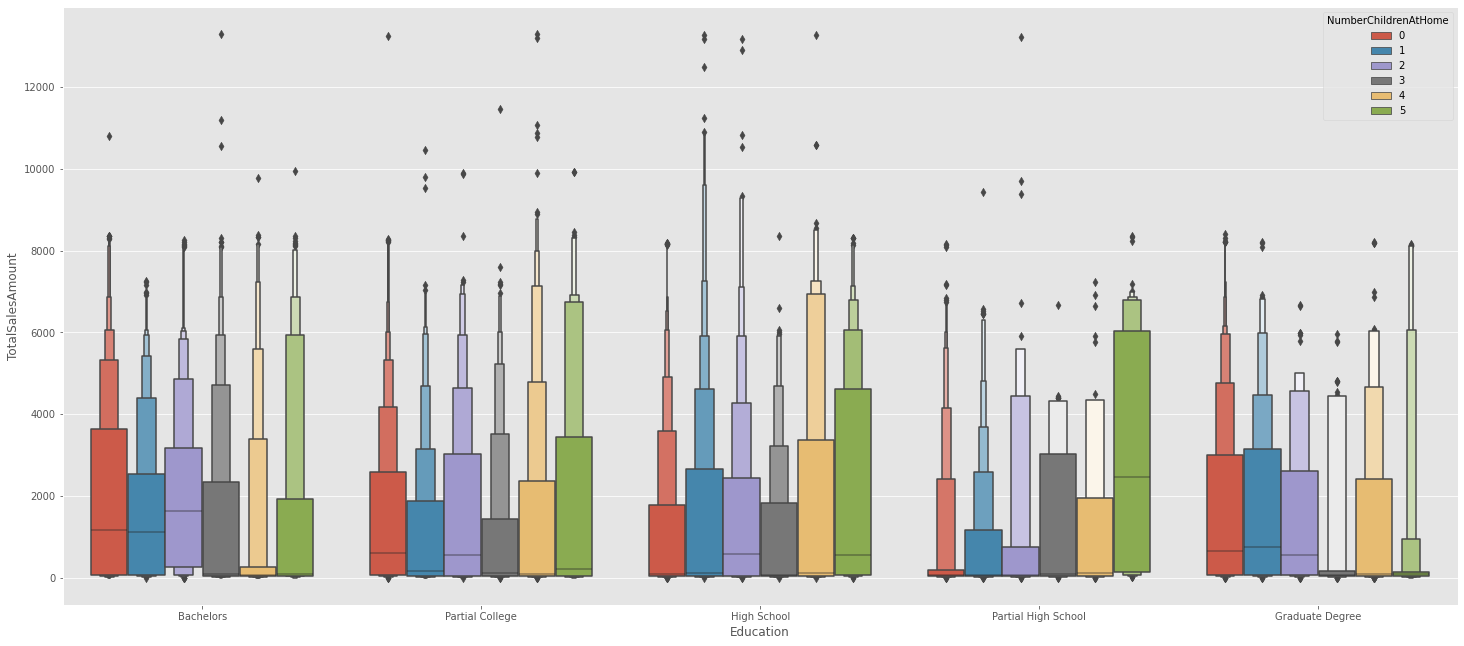

In [ ]:
plt.figure(figsize=(25,11))

sns.boxenplot(x='Education', y='TotalSalesAmount', data=adWork_Raw, hue='NumberChildrenAtHome')
plt.show()

<Figure size 648x504 with 0 Axes>

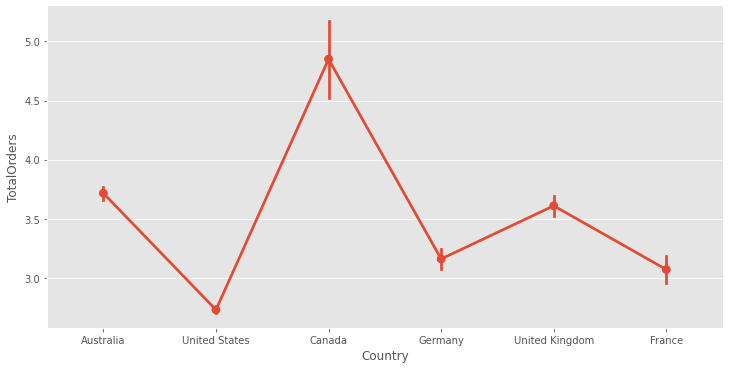

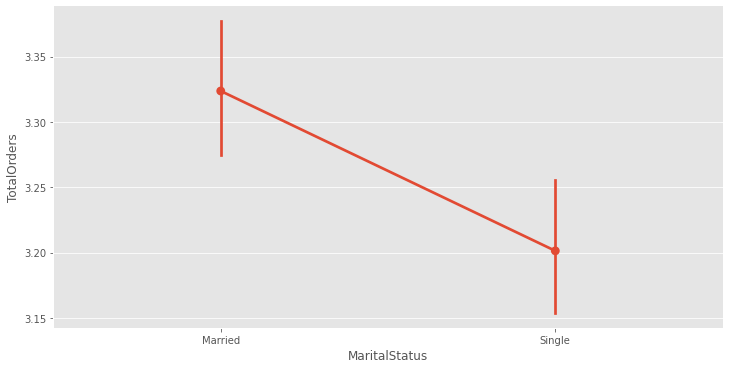

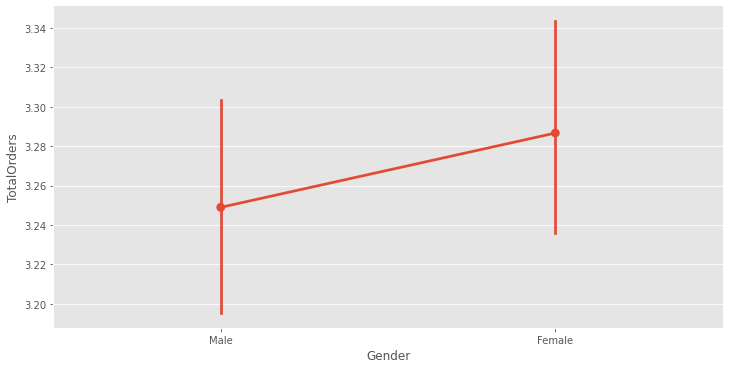

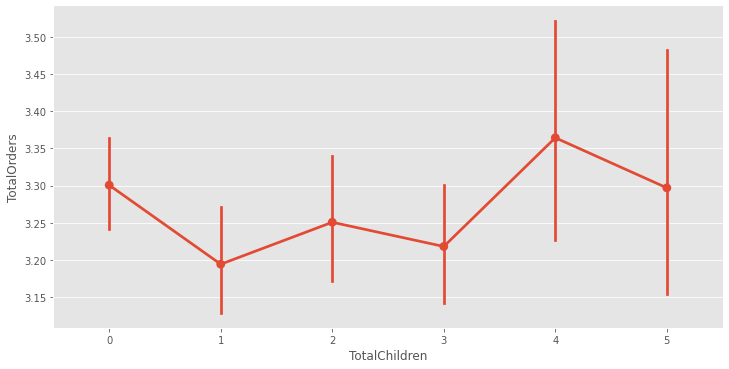

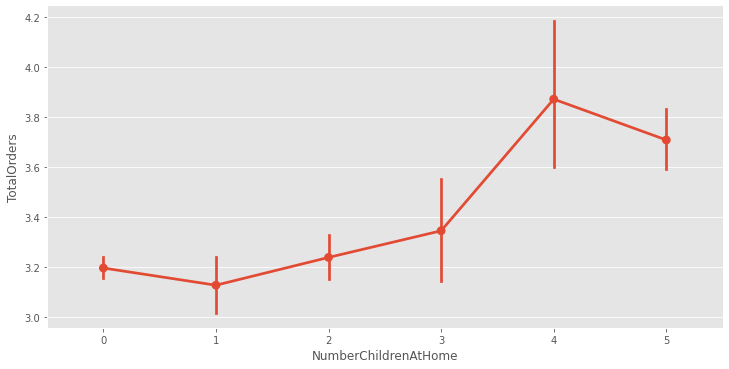

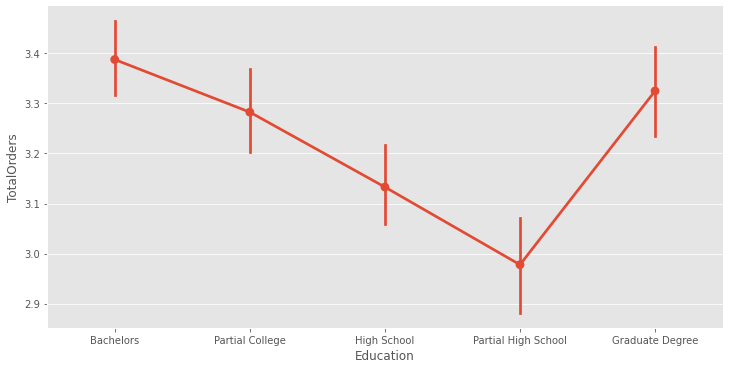

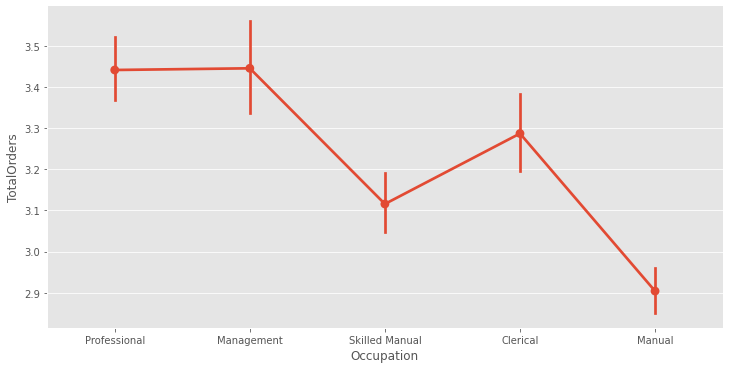

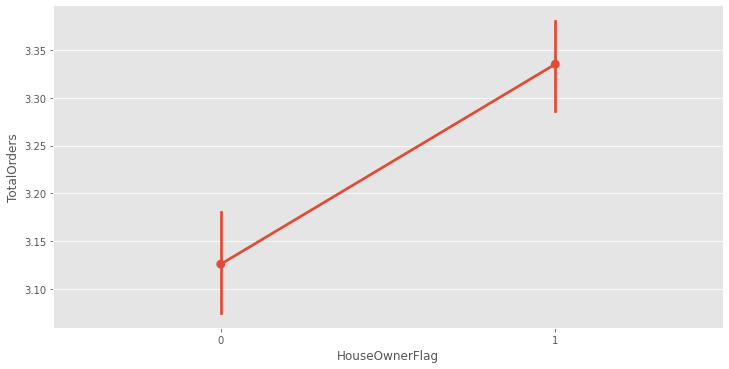

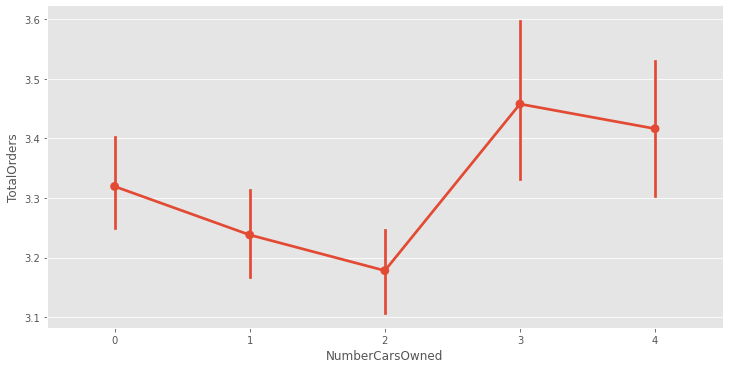

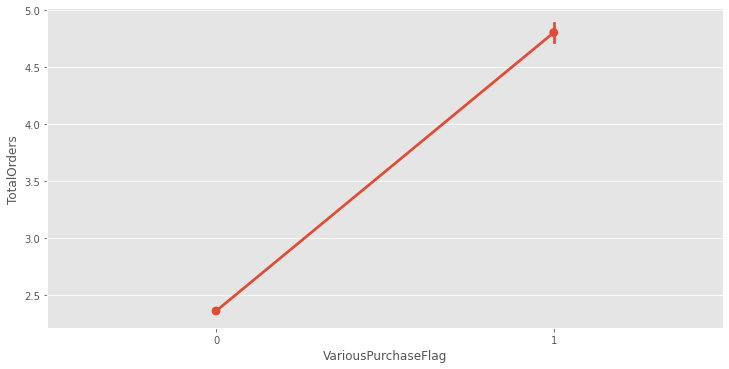

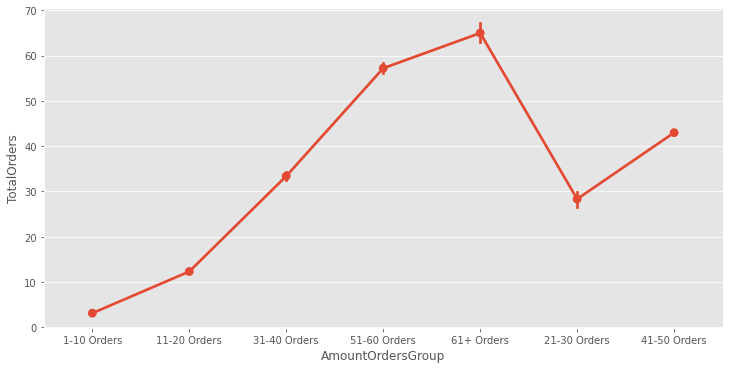

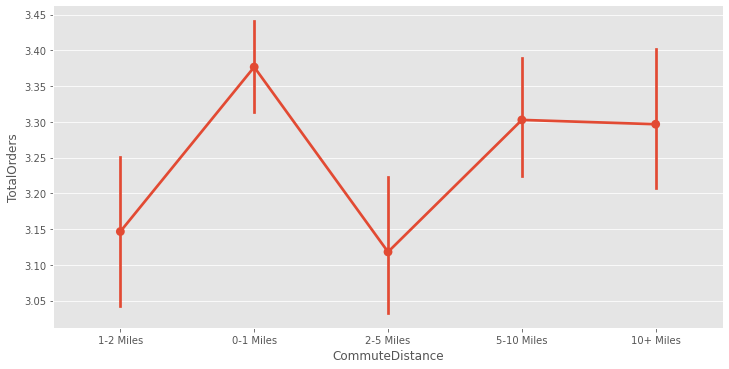

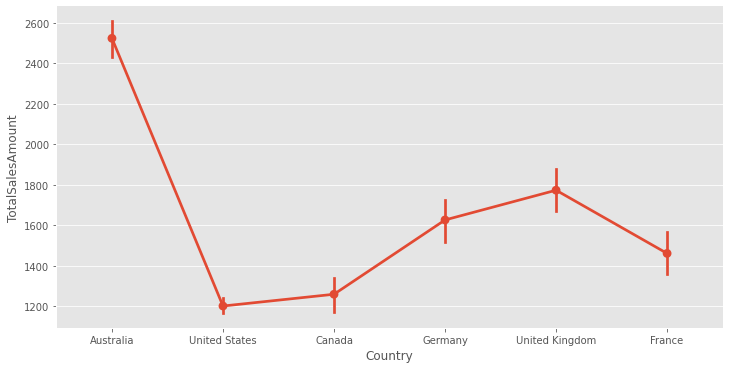

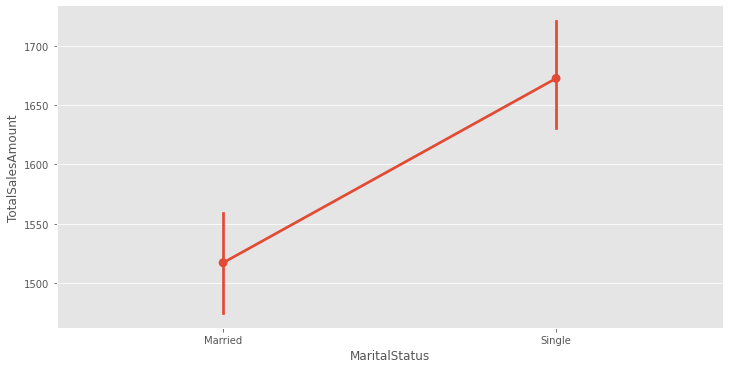

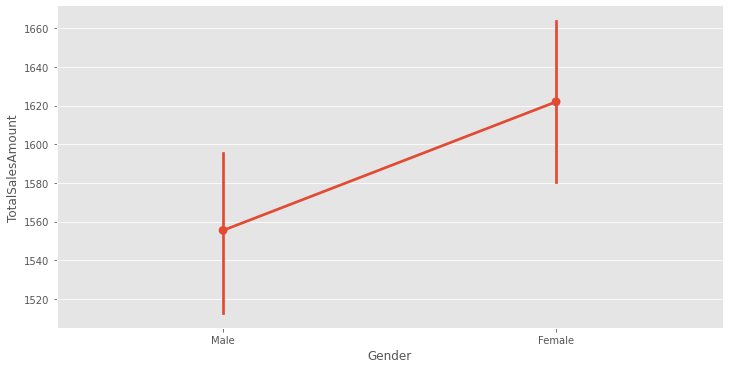

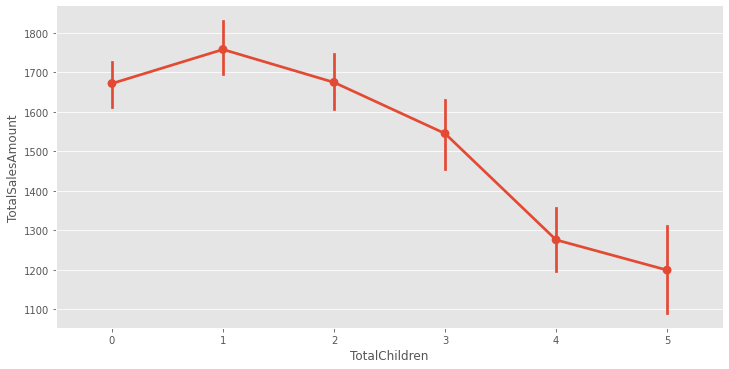

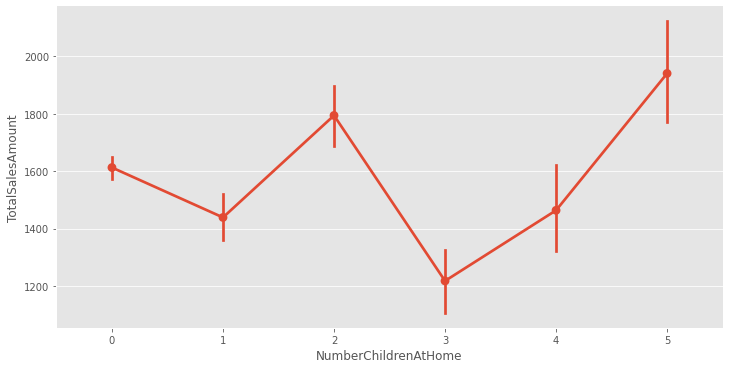

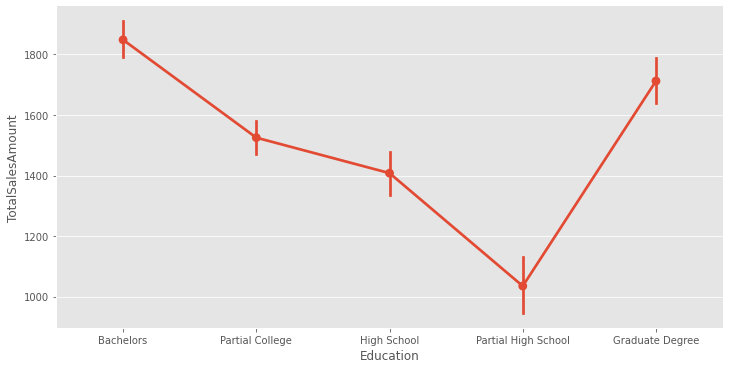

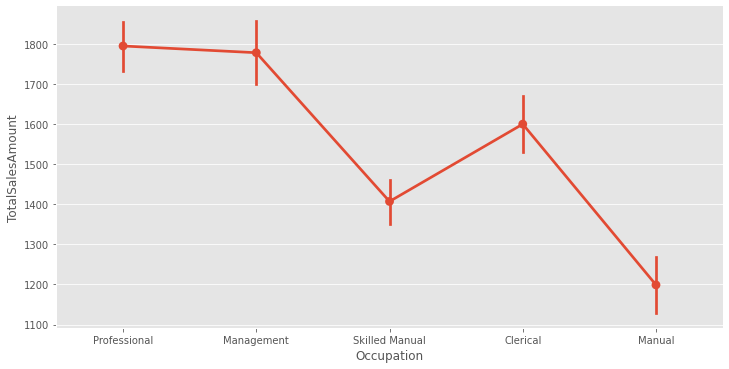

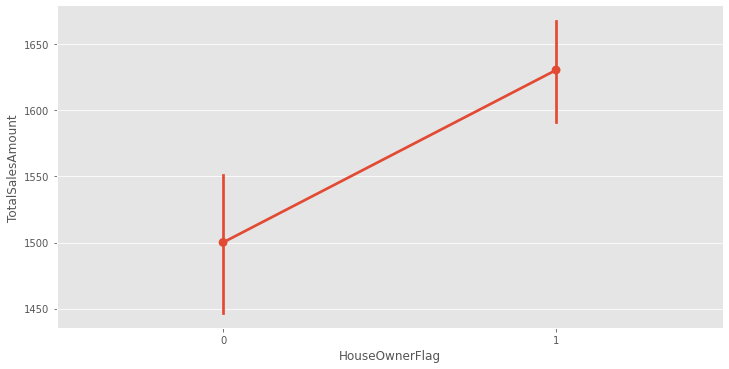

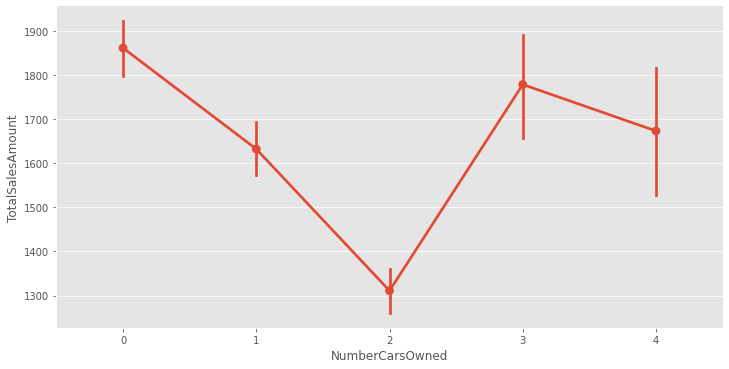

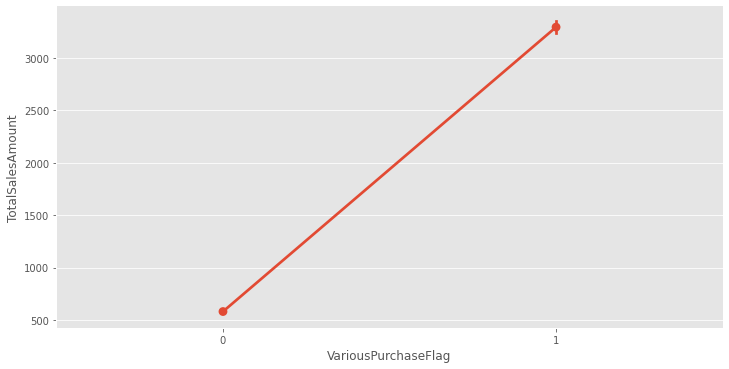

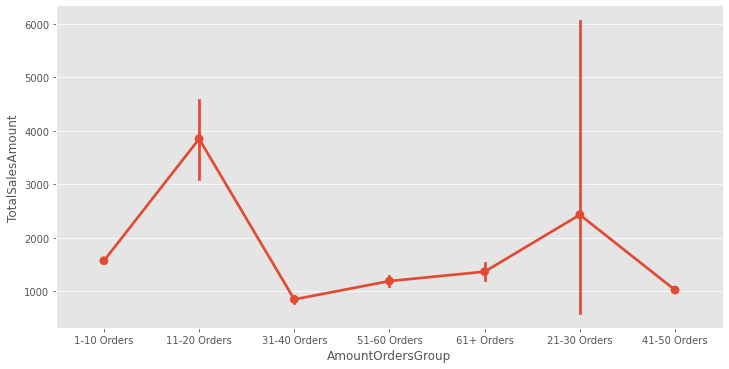

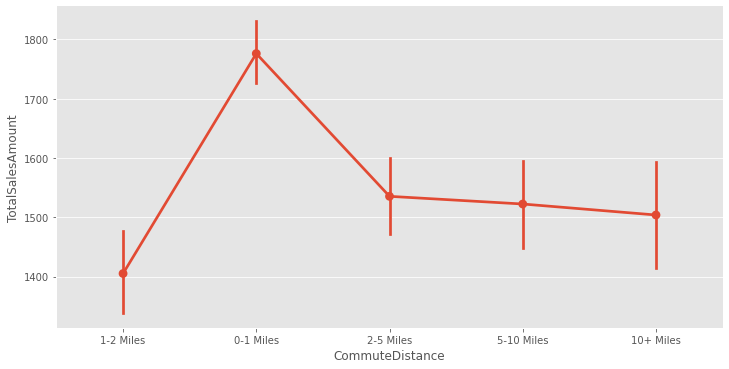

In [ ]:
plt.figure(figsize=(9,7))

for label in ['TotalOrders', 'TotalSalesAmount']:
  for feature in ['Country', 'MaritalStatus', 'Gender', 'TotalChildren', 'NumberChildrenAtHome', 'Education', 'Occupation', 'HouseOwnerFlag', 'NumberCarsOwned', 'VariousPurchaseFlag', 'AmountOrdersGroup', 'CommuteDistance']:
    sns.catplot(
        x=feature,
        y=label,
        data=adWork_Raw,
        kind='point',
        aspect=2
    )
    plt.show()

<Figure size 648x504 with 0 Axes>

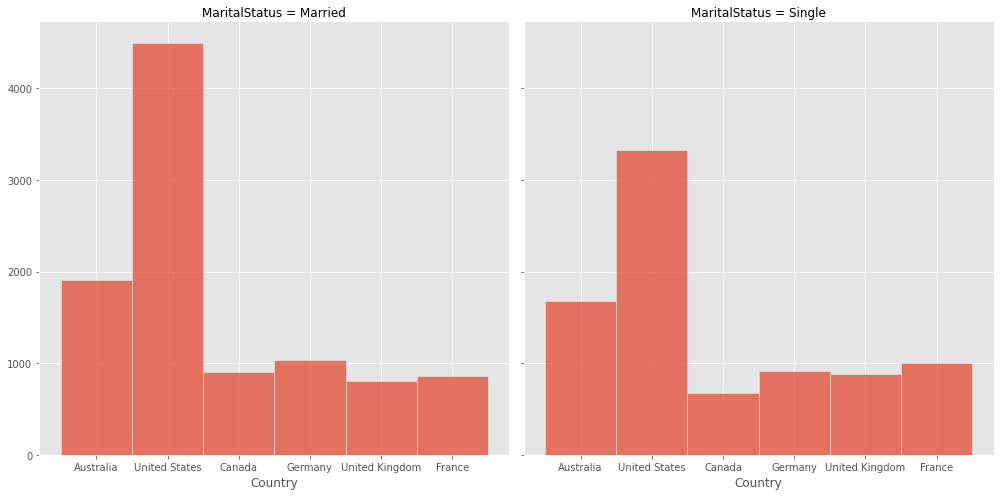

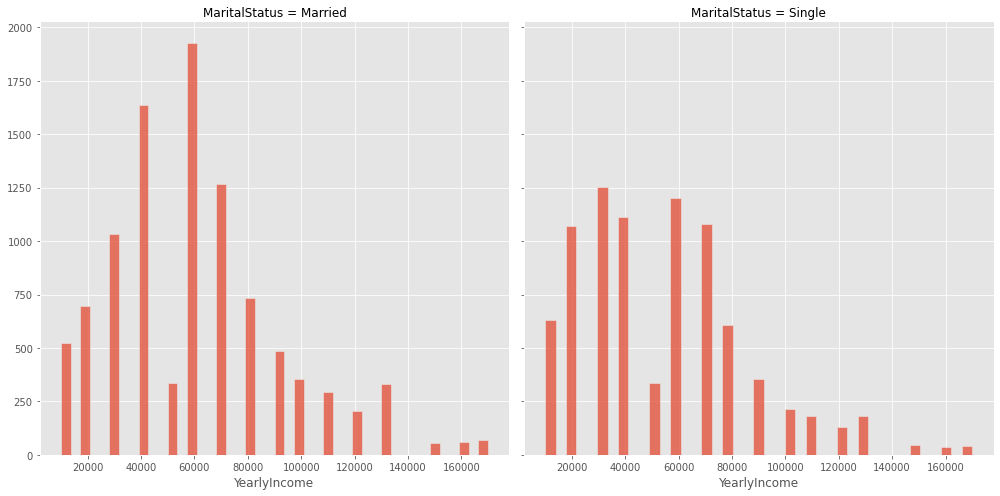

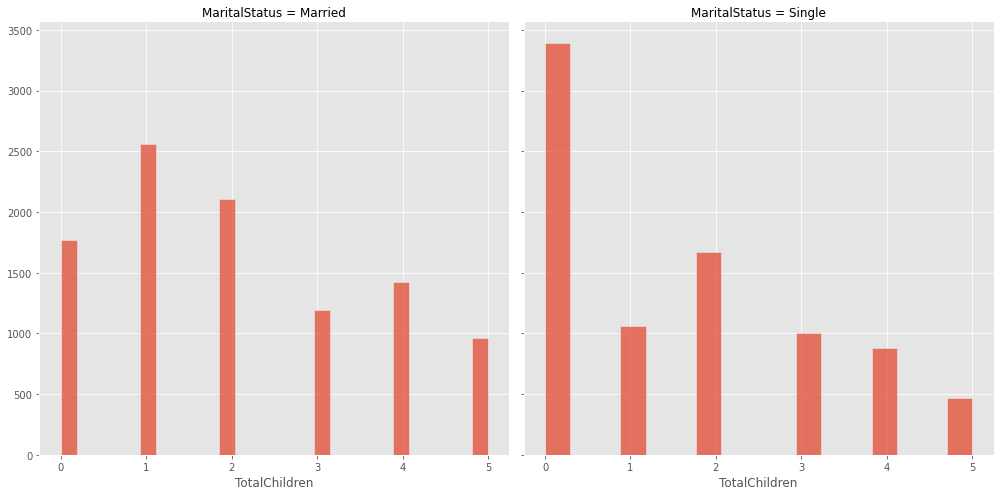

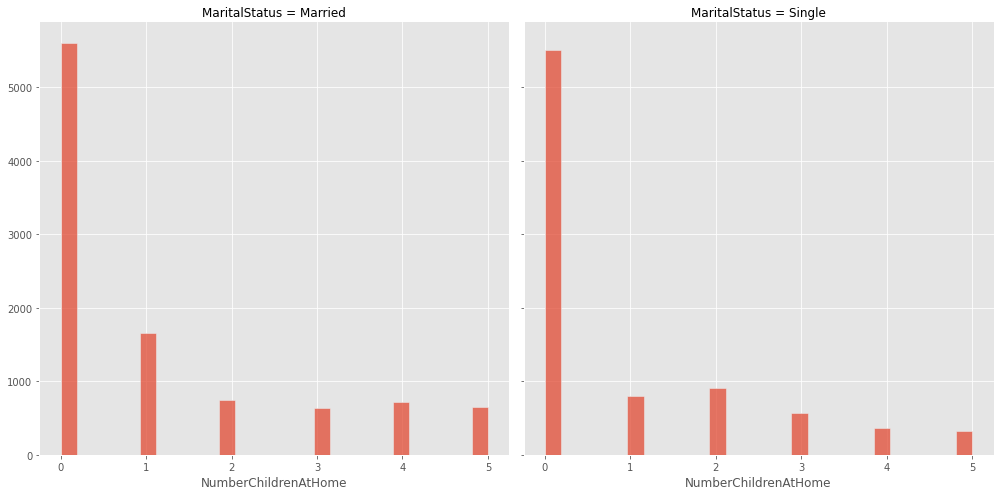

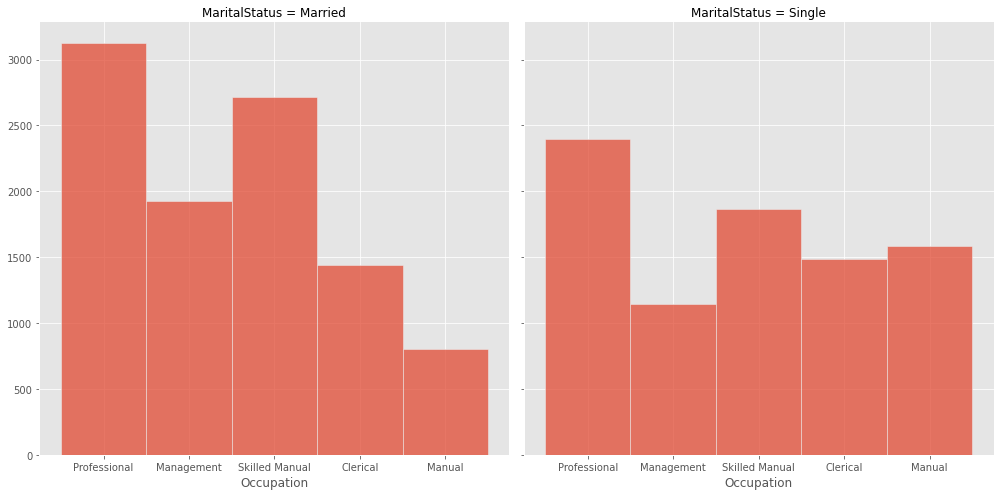

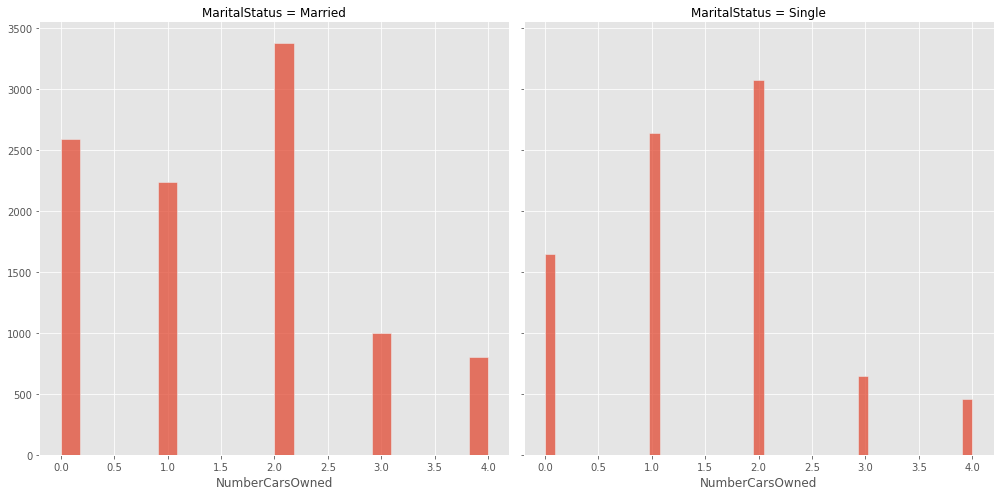

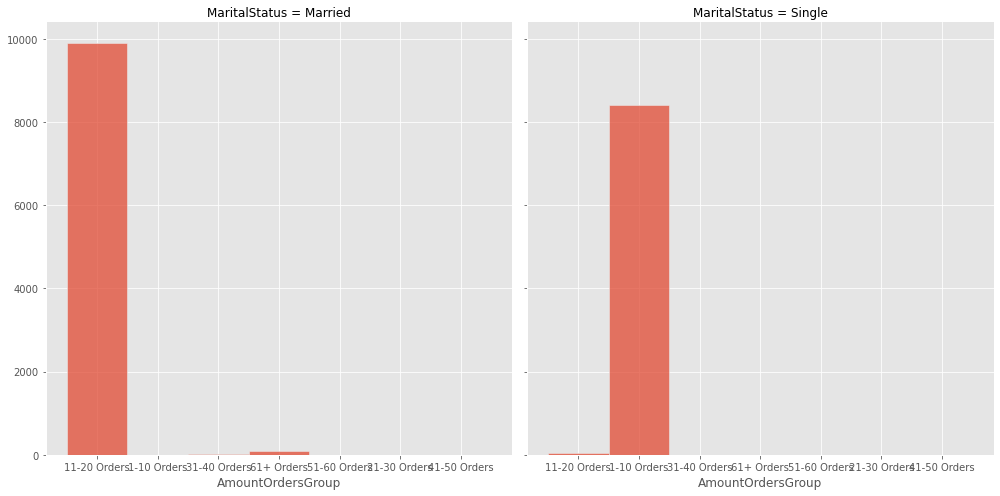

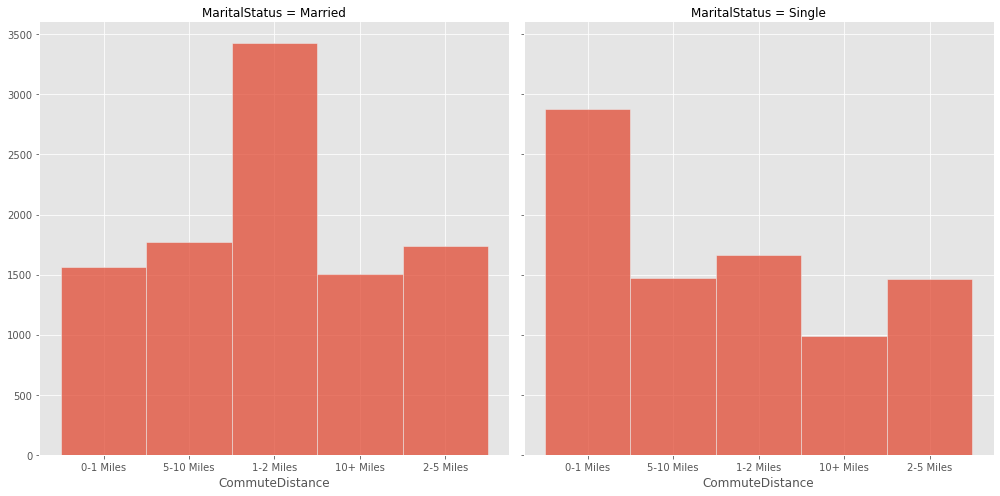

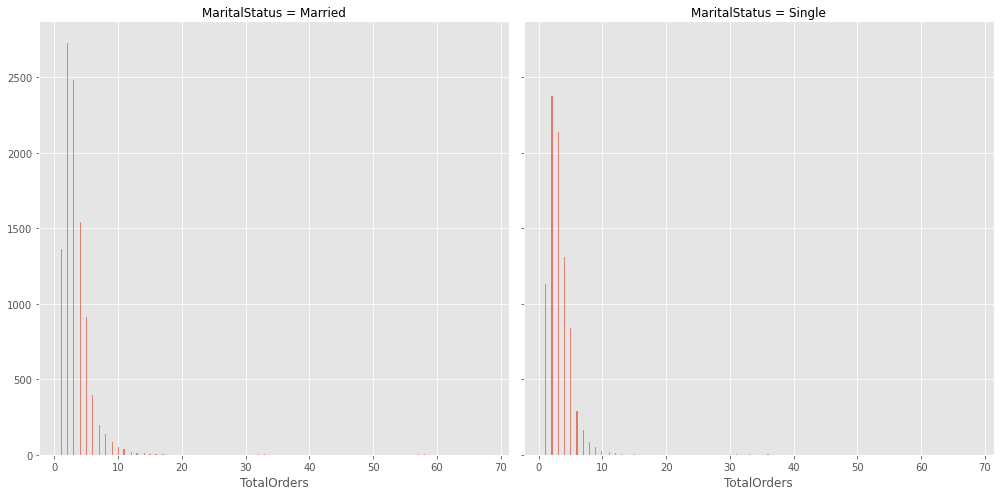

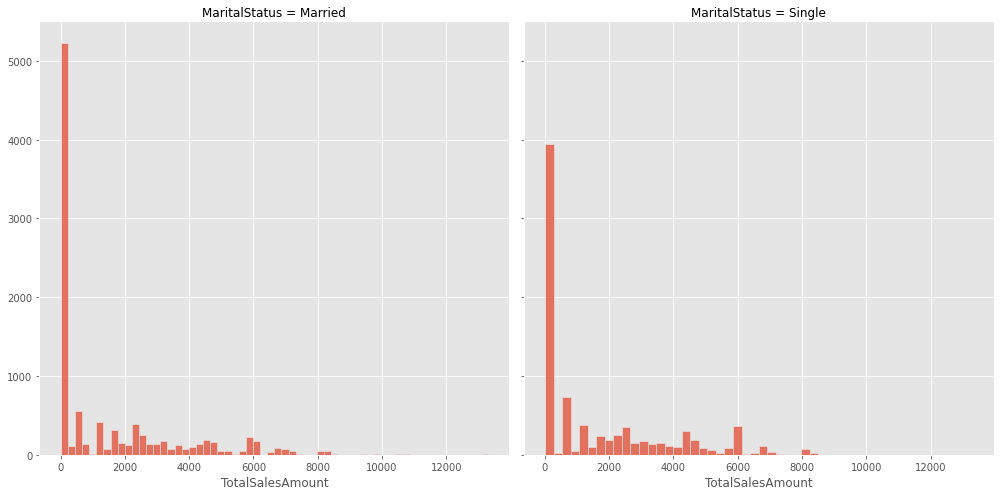

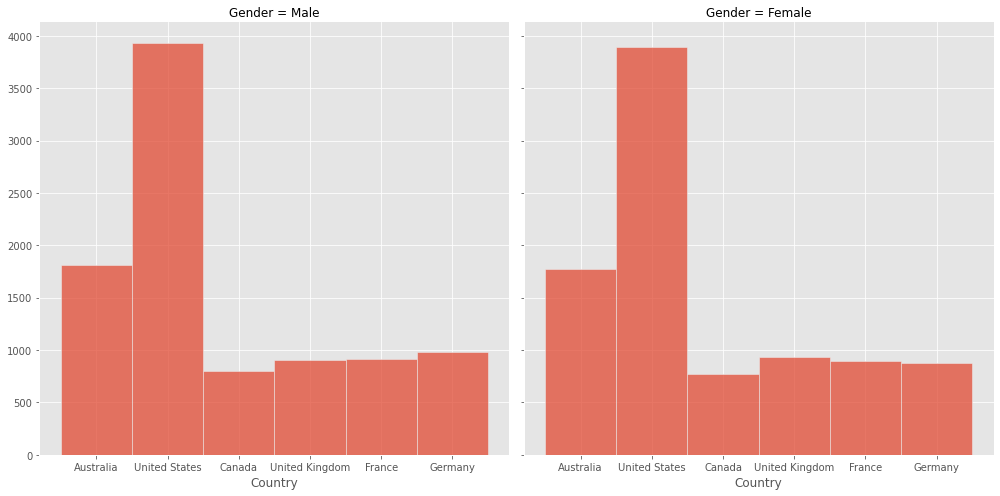

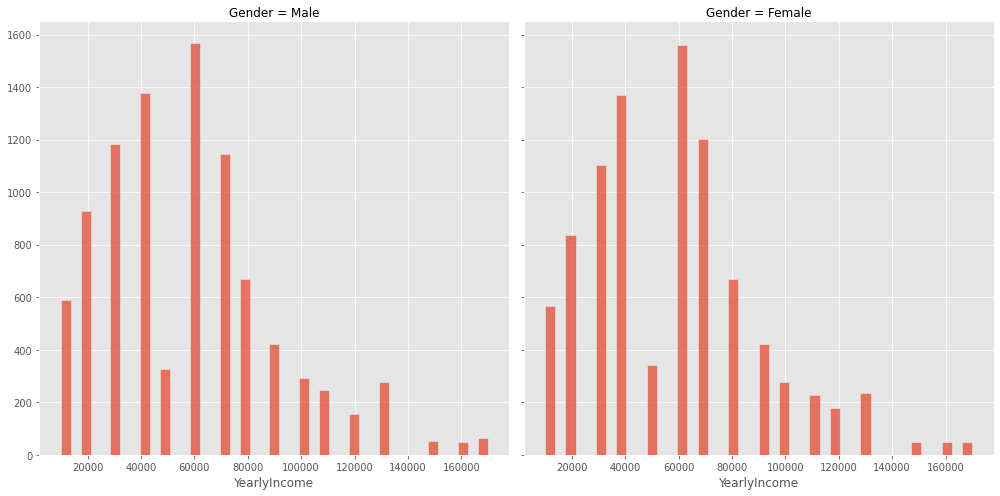

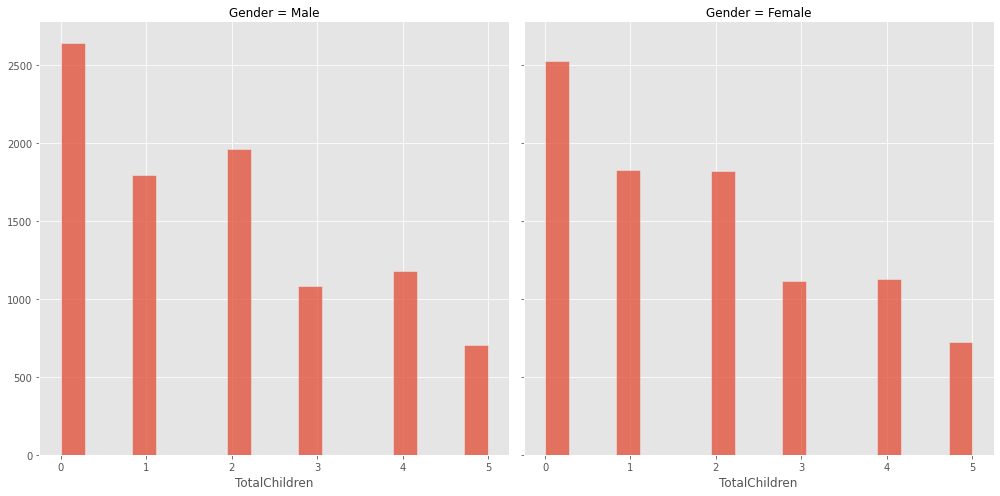

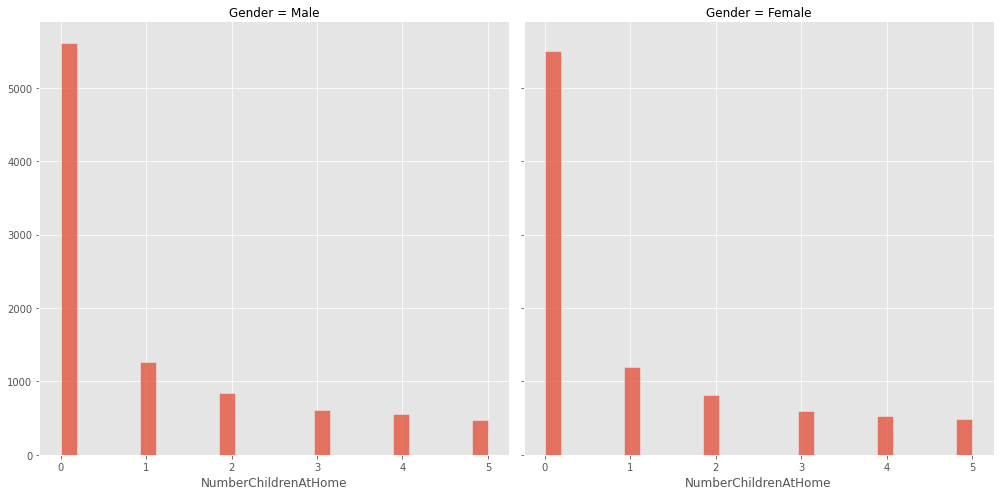

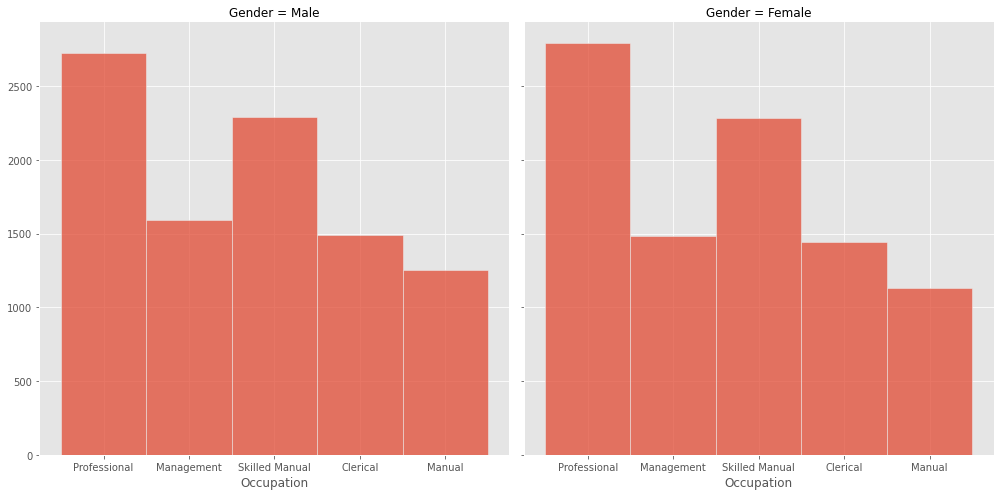

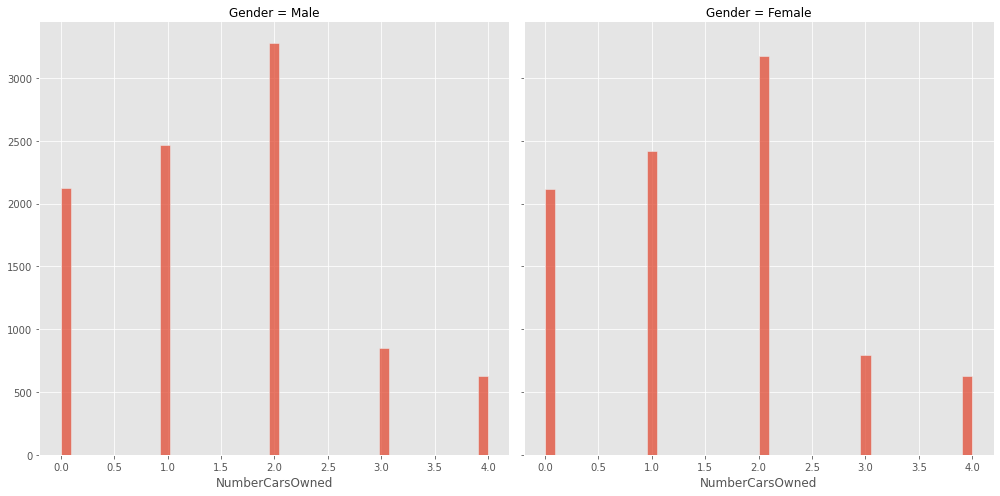

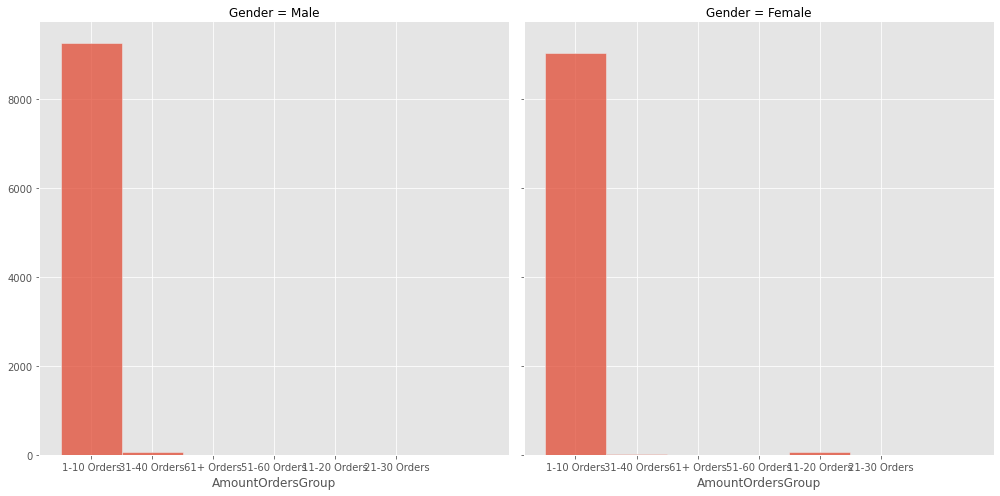

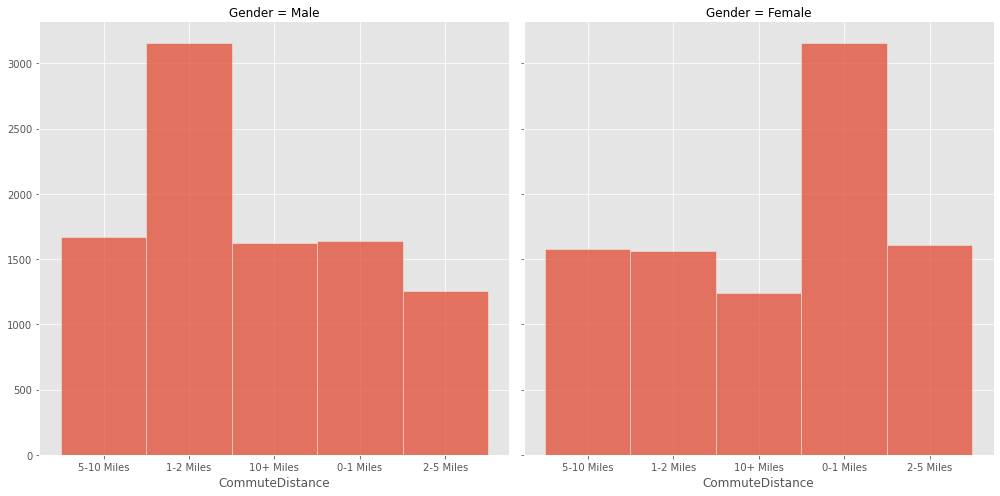

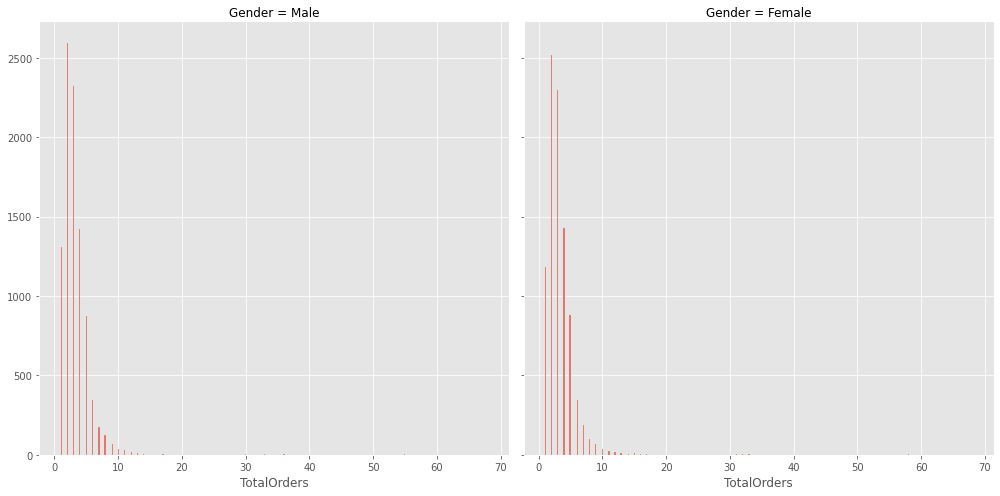

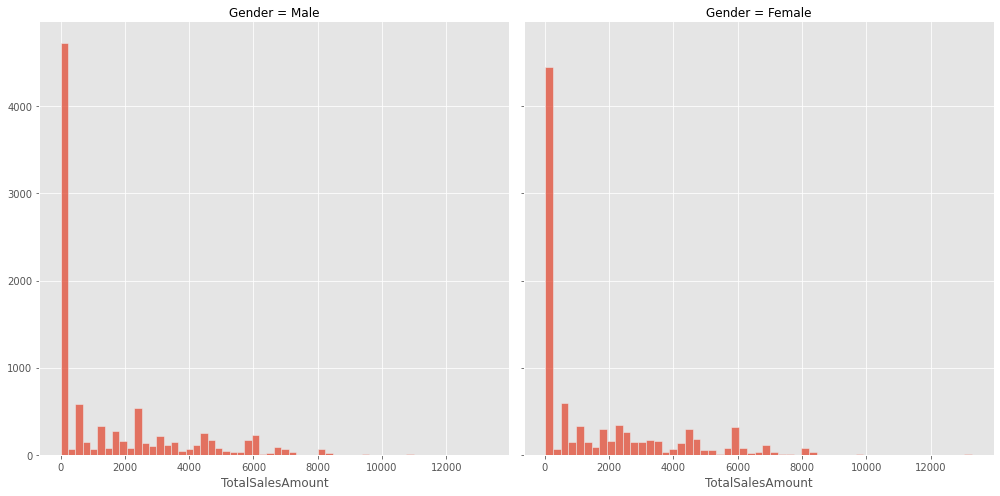

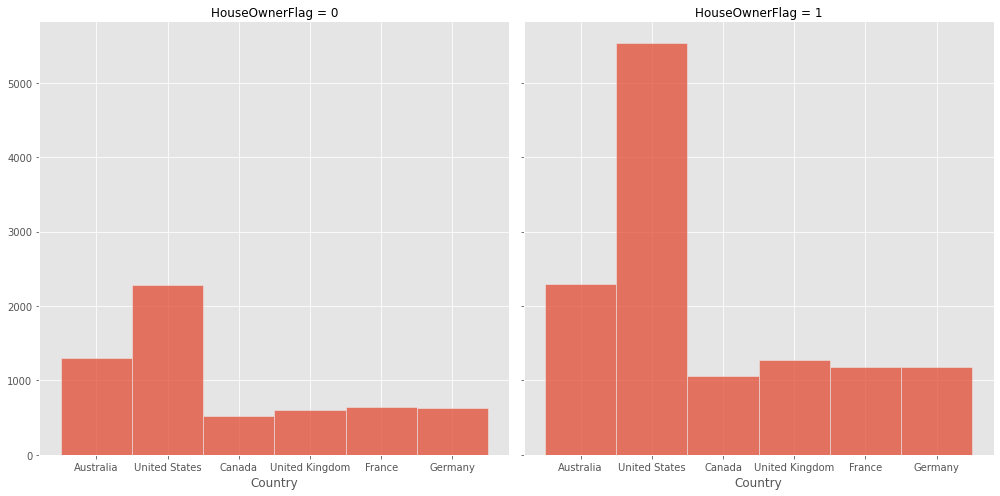

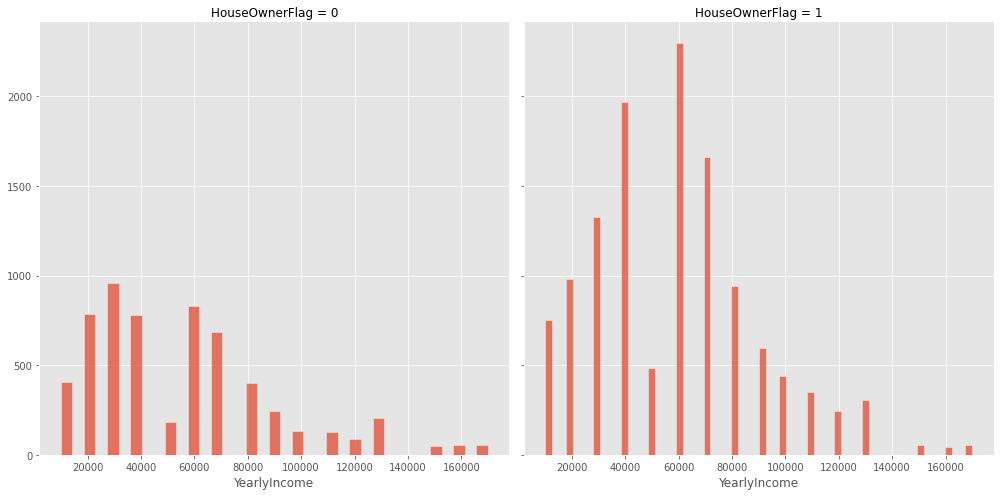

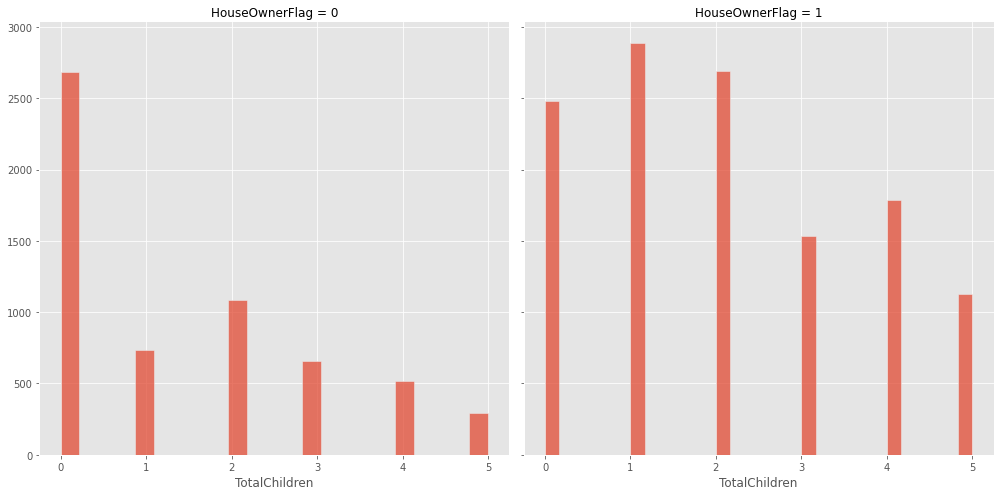

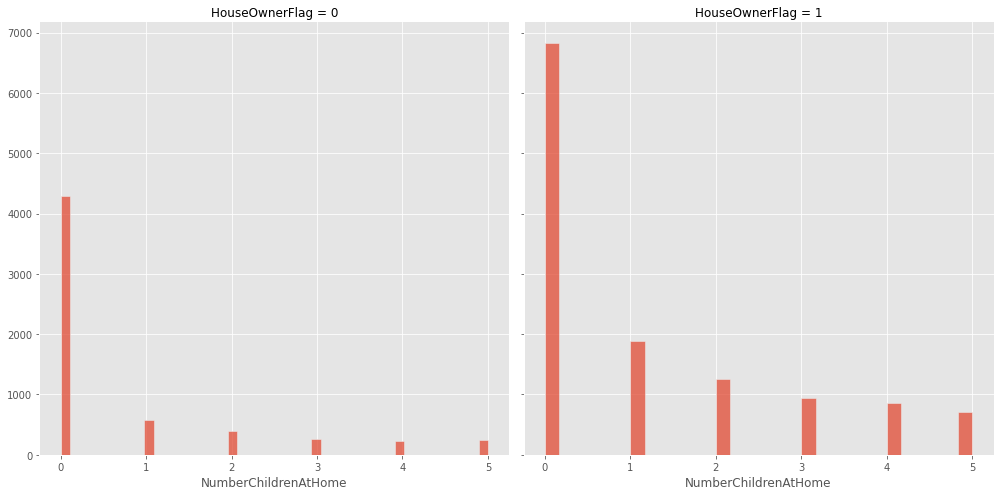

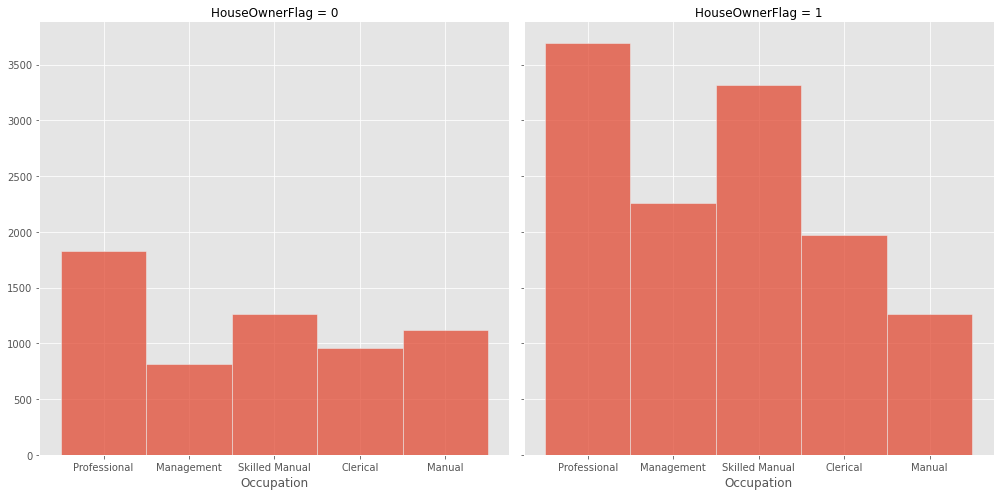

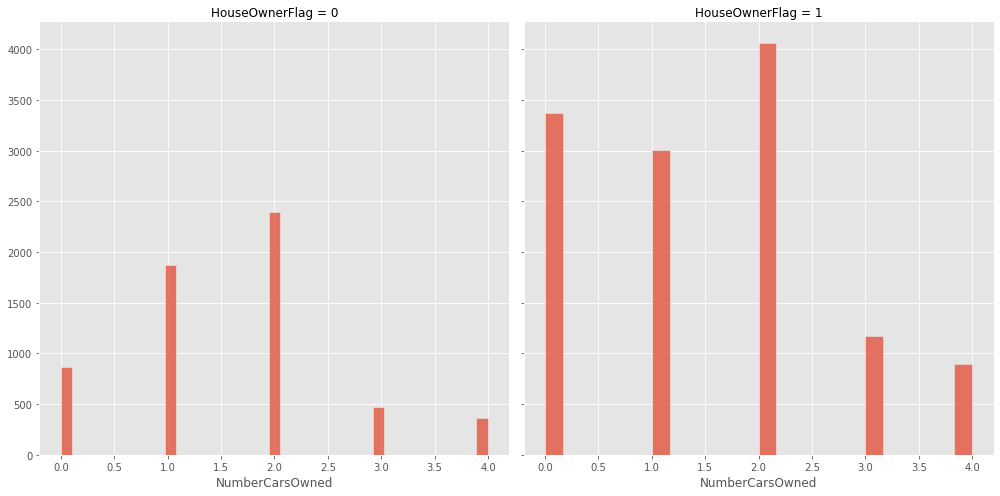

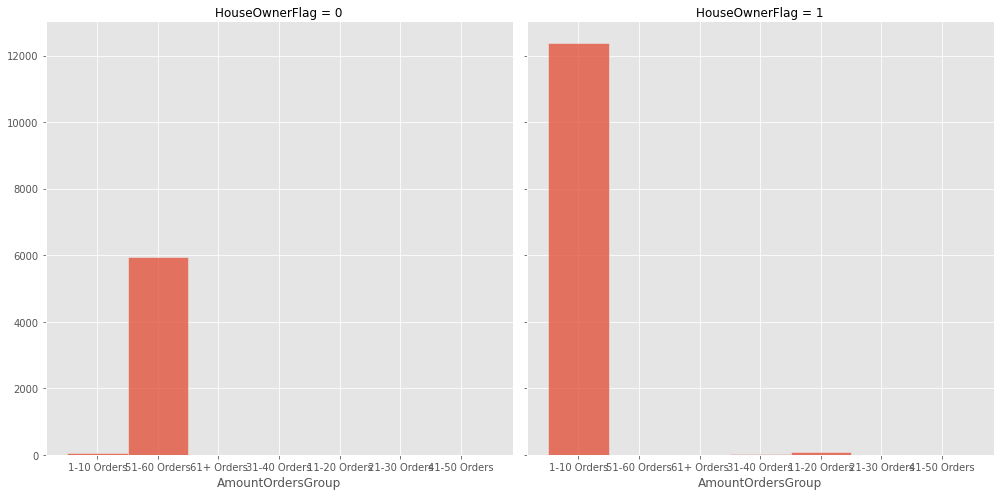

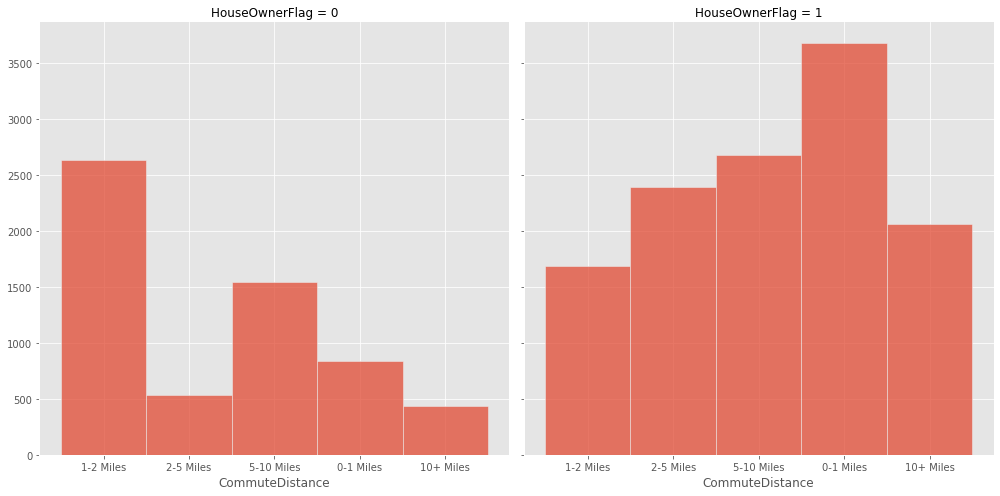

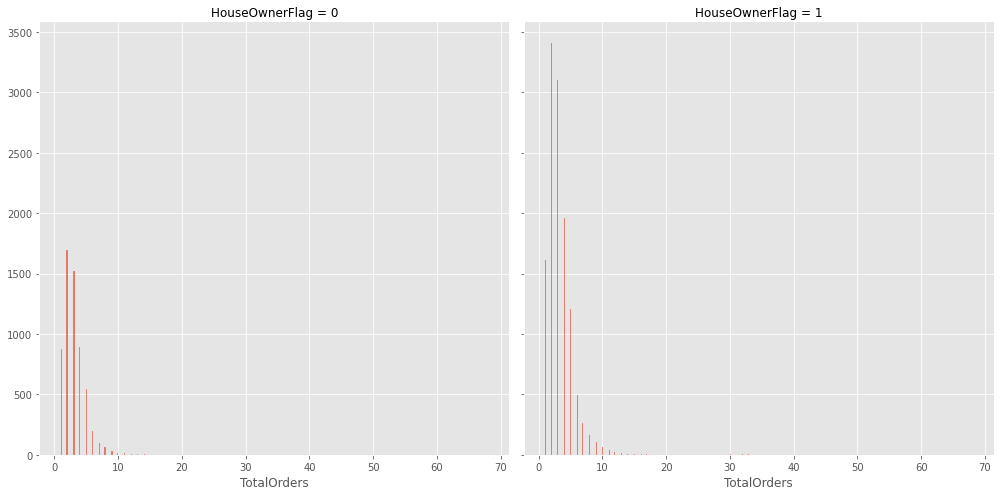

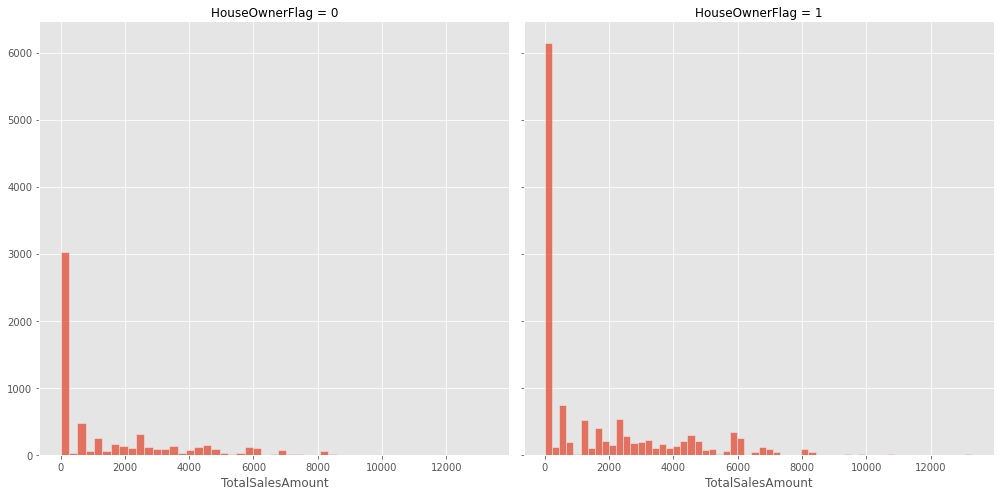

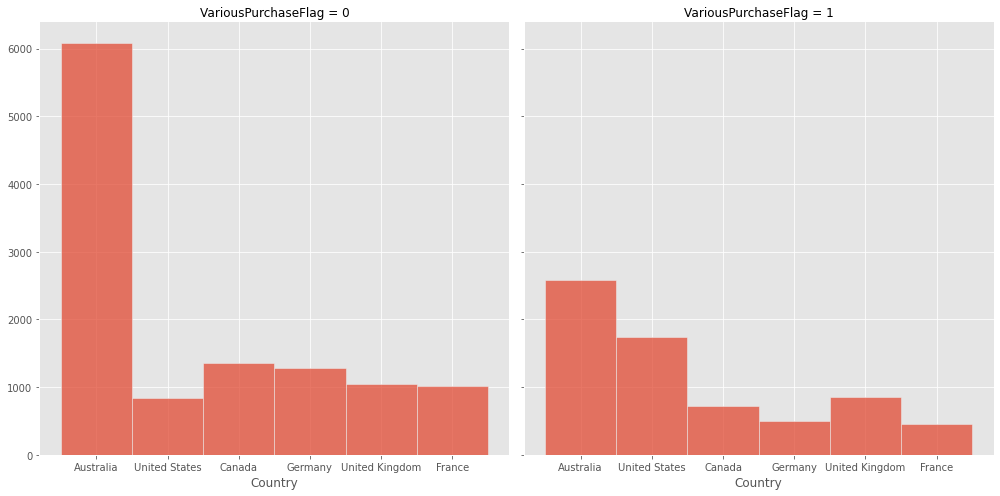

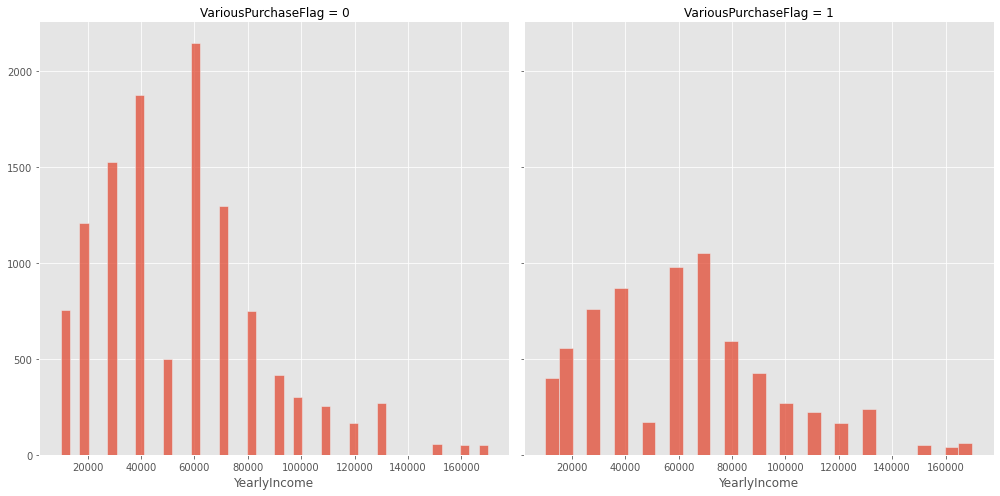

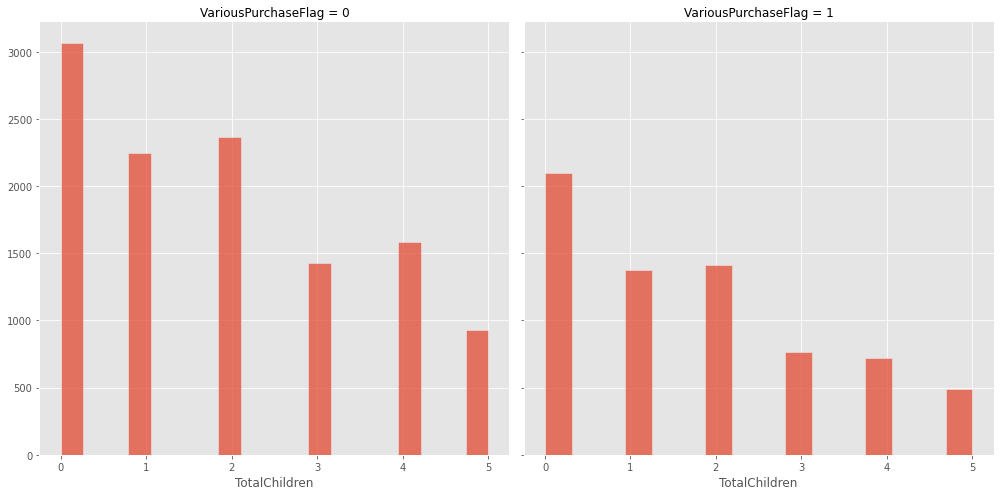

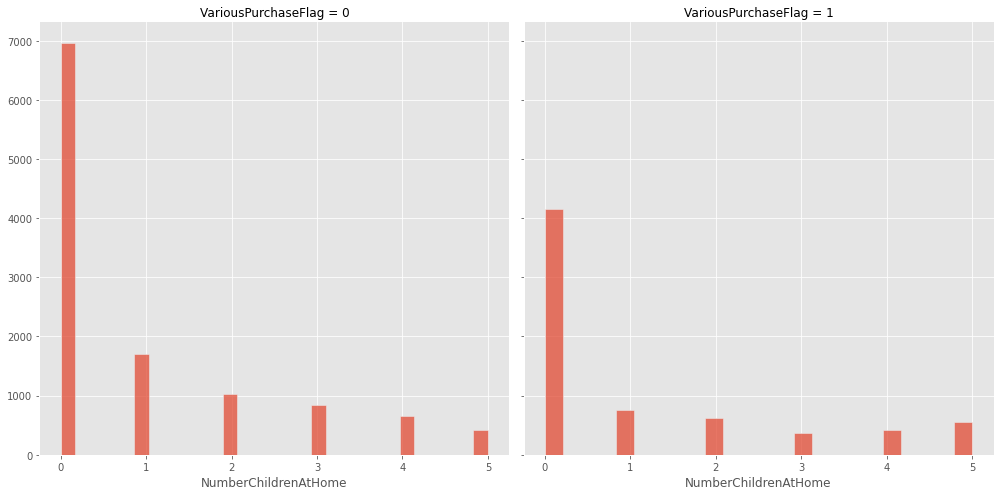

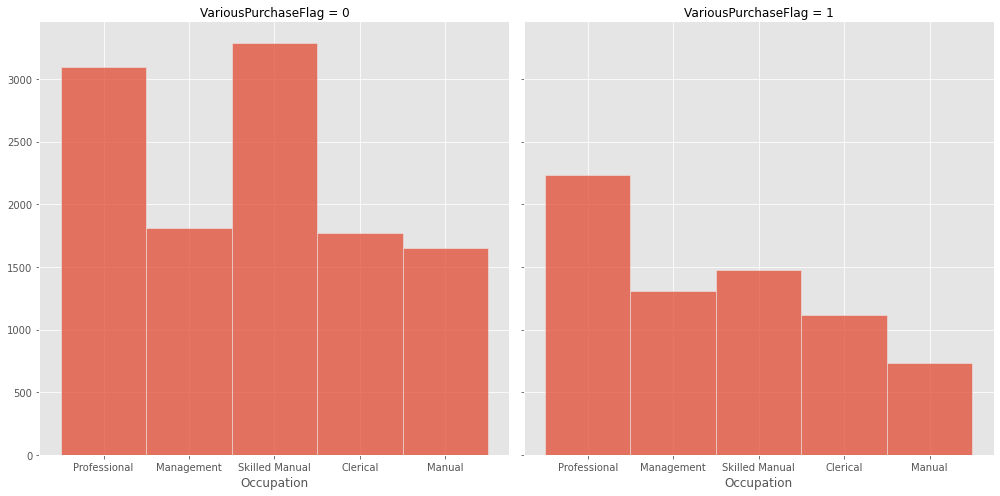

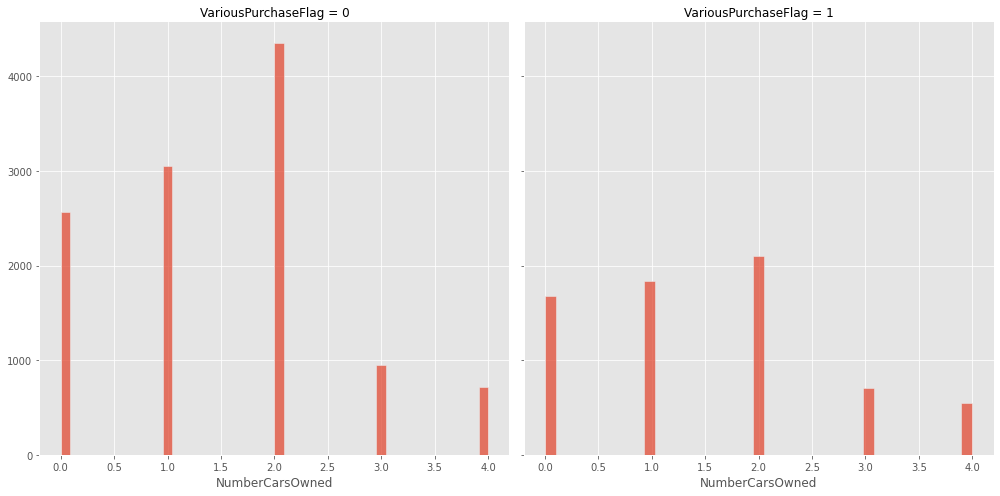

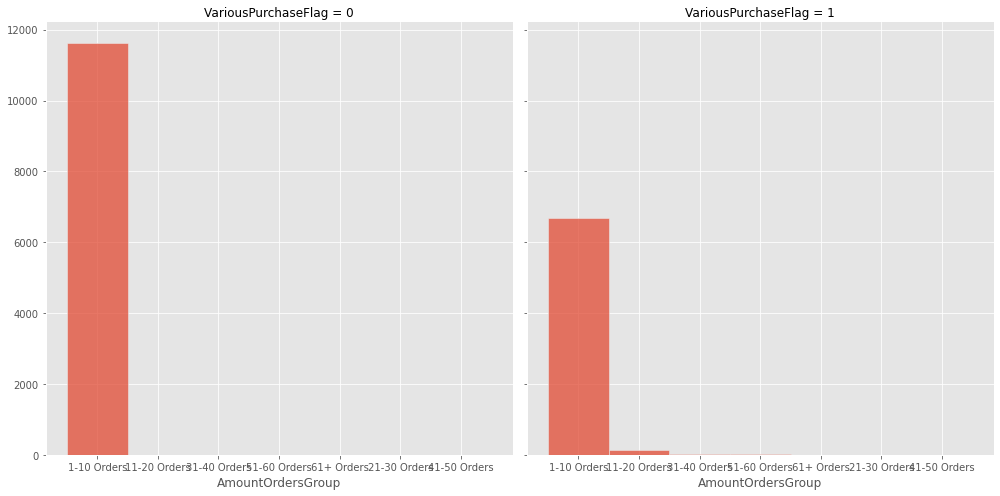

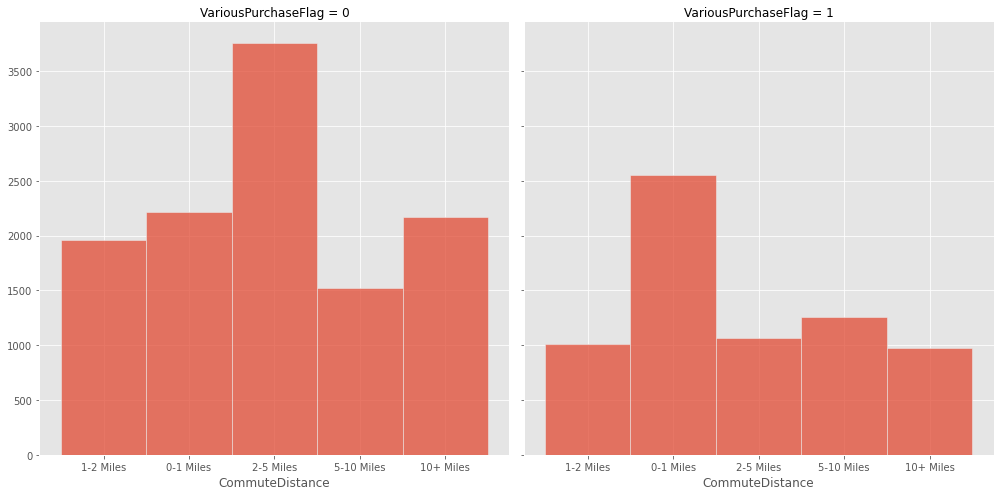

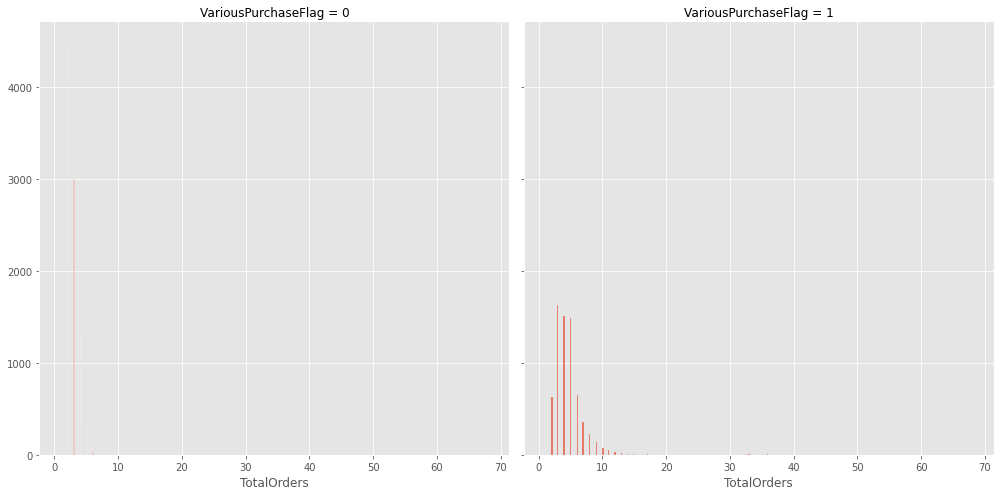

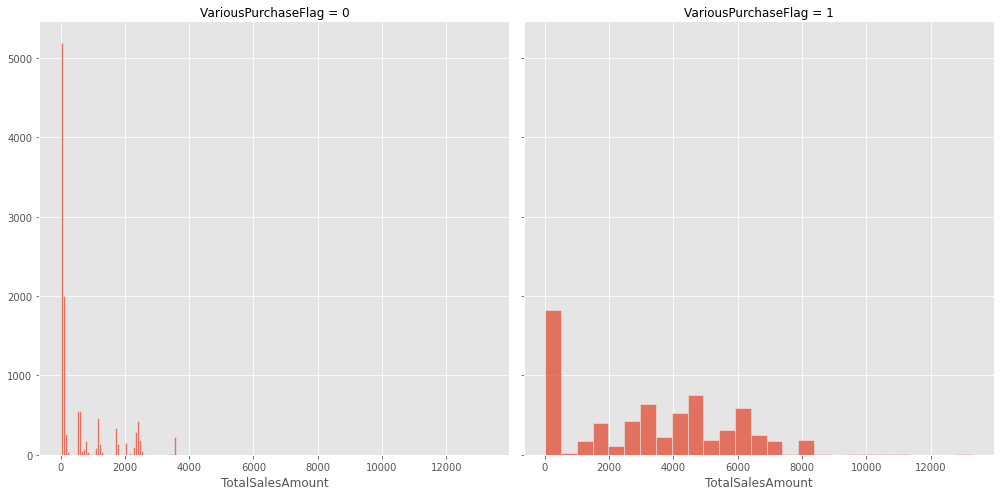

In [ ]:
plt.figure(figsize=(9,7))

for i in ['MaritalStatus', 'Gender', 'HouseOwnerFlag', 'VariousPurchaseFlag']:
  for col in ['Country', 'YearlyIncome', 'TotalChildren', 'NumberChildrenAtHome', 'Occupation', 'NumberCarsOwned', 'AmountOrdersGroup', 'CommuteDistance', 'TotalOrders', 'TotalSalesAmount']:
    g = sns.FacetGrid(adWork_Raw, col=i, height=7, )
    g.map(sns.histplot, col)
    
    #axes = g.axes.flatten()
    #axes[0].set_title("Male")
    #axes[1].set_title("Female")

    plt.show()

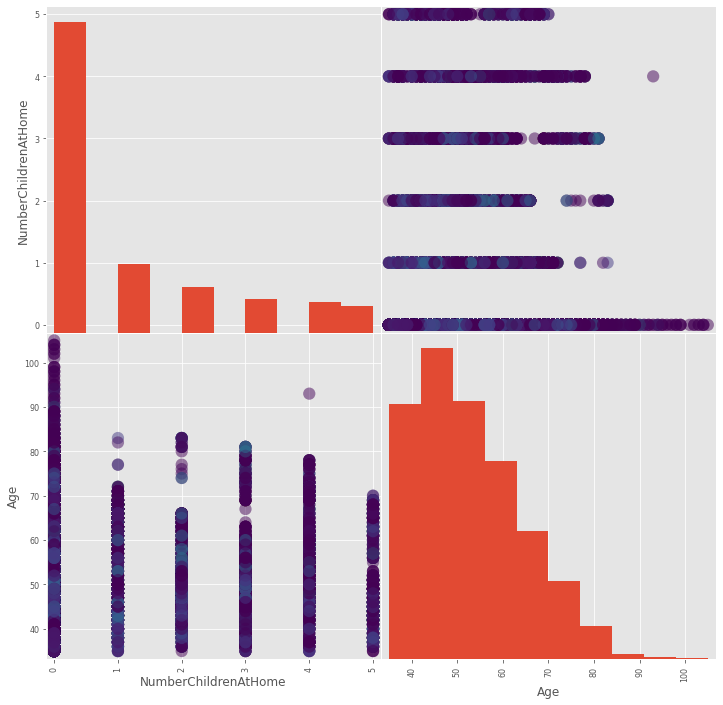

In [ ]:
y = adWork_Raw['TotalSalesAmount']
adWork_Raw_Corr = adWork_Raw[['NumberChildrenAtHome', 'Age']]

pd.plotting.scatter_matrix(adWork_Raw_Corr, c=y, figsize=(12, 12), s=150, marker='O')

plt.show()

In [ ]:
## from sklearn.preprocessing import LabelEncoder

In [ ]:
## for feature in ['MaritalStatus', 'Gender', 'Education', 'Occupation', 'AmountOrdersGroup', 'CommuteDistance']:
##  le = LabelEncoder()
##  adWork_Raw[feature] = le.fit_transform(adWork_Raw[feature].astype(str))

In [ ]:
marital_map = {
    'Single': 0,
    'Married': 1
}
adWork_Raw['MaritalStatus'] = adWork_Raw['MaritalStatus'].map(marital_map)

In [ ]:
gender_map = {
    'Female': 0,
    'Male': 1
}
adWork_Raw['Gender'] = adWork_Raw['Gender'].map(gender_map)

In [ ]:
edu_map = {
    'Partial High School': 0,
    'High School': 1,
    'Partial College': 2,
    'Bachelors': 3,
    'Graduate Degree': 4
}
adWork_Raw['Education'] = adWork_Raw['Education'].map(edu_map)

In [ ]:
occupa_map = {
    'Clerical': 0,
    'Manual': 1,
    'Skilled Manual': 2,
    'Management': 3,
    'Professional': 4
}
adWork_Raw['Occupation'] = adWork_Raw['Occupation'].map(occupa_map)

In [ ]:
ordersgroup_map = {
    '1-10 Orders': 0,
    '11-20 Orders': 1,
    '21-30 Orders': 2,
    '31-40 Orders': 3,
    '41-50 Orders': 4,
    '51-60 Orders': 5,
    '61+ Orders': 6
}
adWork_Raw['AmountOrdersGroup'] = adWork_Raw['AmountOrdersGroup'].map(ordersgroup_map)

In [ ]:
commugroup_map = {
    '0-1 Miles': 0,
    '1-2 Miles': 1,
    '2-5 Miles': 2,
    '5-10 Miles': 3,
    '10+ Miles': 4
}
adWork_Raw['CommuteDistance'] = adWork_Raw['CommuteDistance'].map(commugroup_map)

In [ ]:
country_map = {
    'Australia': 0,
    'Canada': 1,
    'Germany': 2,
    'France': 3,
    'United Kingdom': 4,
    'United States': 5
}

In [ ]:
adWork_Raw['Country'] = adWork_Raw['Country'].map(country_map)

In [ ]:
adWork_Raw.head()

,CustomerKey,Country,City,MaritalStatus,Age,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,Education,Occupation,HouseOwnerFlag,NumberCarsOwned,VariousPurchaseFlag,AmountOrdersGroup,CommuteDistance,FirstToLastOrderDate,TotalOrders,TotalSalesAmount
0,11000,0,Rockhampton,1,50,1,90000.0,2,0,3,4,1,0,1,0,1,835,8,8248.99
1,11001,0,Seaford,0,45,1,60000.0,3,3,3,4,0,1,1,1,0,1060,11,6383.88
2,11002,0,Hobart,1,50,1,60000.0,3,3,3,4,1,1,1,0,2,778,4,8114.04
3,11003,0,North Ryde,0,48,0,70000.0,0,0,3,4,0,1,1,0,3,863,9,8139.29
4,11004,0,Wollongong,0,42,0,80000.0,5,5,3,4,1,4,1,0,1,829,6,8196.01


In [ ]:
adWork_Raw.dtypes

CustomerKey               int64
Country                   int64
City                     object
MaritalStatus             int64
Age                       int64
Gender                    int64
YearlyIncome            float64
TotalChildren             int64
NumberChildrenAtHome      int64
Education                 int64
Occupation                int64
HouseOwnerFlag            int64
NumberCarsOwned           int64
VariousPurchaseFlag       int64
AmountOrdersGroup         int64
CommuteDistance           int64
FirstToLastOrderDate      int64
TotalOrders               int64
TotalSalesAmount        float64
dtype: object

In [ ]:
adWork = adWork_Raw.drop(adWork_Raw.iloc[:,[0, 2, 16]], axis=1)

In [ ]:
adWork.to_csv('/content/drive/MyDrive/Data/adWork.csv')

In [ ]:
adWork.columns

Index(['Country', 'MaritalStatus', 'Age', 'Gender', 'YearlyIncome',
       'TotalChildren', 'NumberChildrenAtHome', 'Education', 'Occupation',
       'HouseOwnerFlag', 'NumberCarsOwned', 'VariousPurchaseFlag',
       'AmountOrdersGroup', 'CommuteDistance', 'TotalOrders',
       'TotalSalesAmount'],
      dtype='object')

In [ ]:
adWork_cmatrix = adWork[['Country', 'MaritalStatus', 'Age', 'Gender', 'YearlyIncome', 'TotalChildren', 'NumberChildrenAtHome', 'Education', 'Occupation', 'HouseOwnerFlag', 'NumberCarsOwned', 'CommuteDistance', 'TotalOrders', 'VariousPurchaseFlag', 'TotalSalesAmount']]

corrlabels = 'TotalSalesAmount'

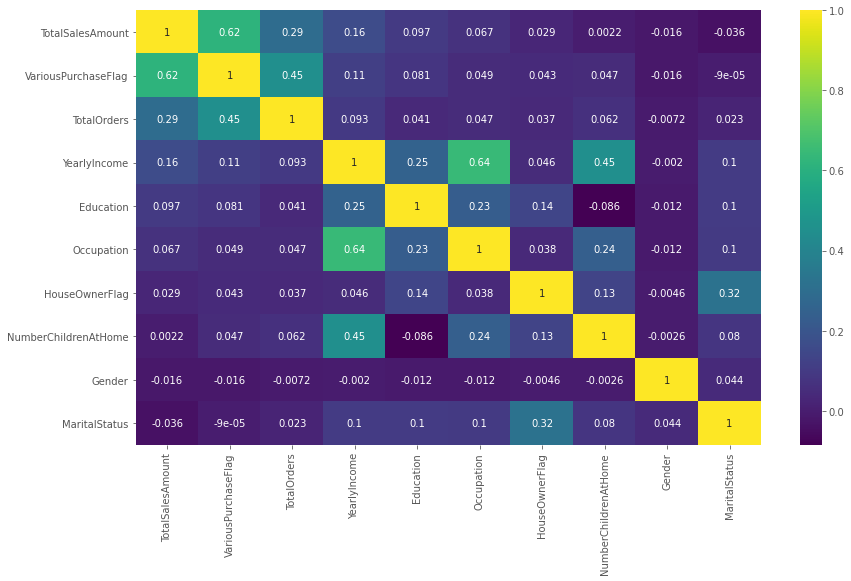

In [ ]:
k =10
cols = adWork_cmatrix.corr().nlargest(k, corrlabels)[corrlabels].index
cm = adWork_cmatrix[cols].corr()

plt.figure(figsize=(14, 8))
sns.heatmap(cm, annot=True, cmap='viridis')

plt.show()

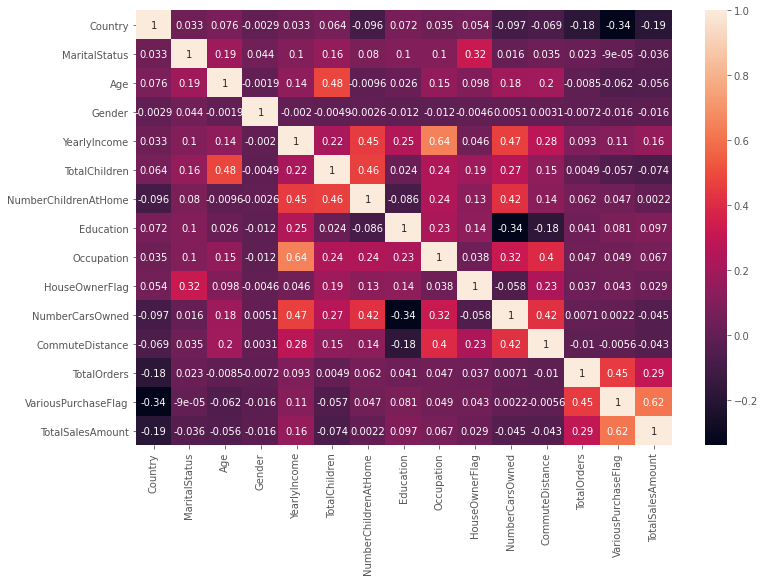

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

sns.heatmap(adWork_cmatrix.corr(), annot=True)

plt.show()

In [ ]:
## X_ = df.loc[:, df.columns != corrlabels]
## y_ = df.loc[:, corrlabels]

In [ ]:
X_ = adWork_cmatrix.loc[:, adWork_cmatrix.columns != corrlabels]
y_ = adWork['TotalSalesAmount']

In [ ]:
X_with_constant = sm.add_constant(X_)
model = sm.OLS(y_, X_with_constant)

In [ ]:
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       TotalSalesAmount   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     914.9
Date:                Thu, 29 Apr 2021   Prob (F-statistic):               0.00
Time:                        16:15:56   Log-Likelihood:            -1.6297e+05
No. Observations:               18484   AIC:                         3.260e+05
Df Residuals:                   18469   BIC:                         3.261e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  683.5485 

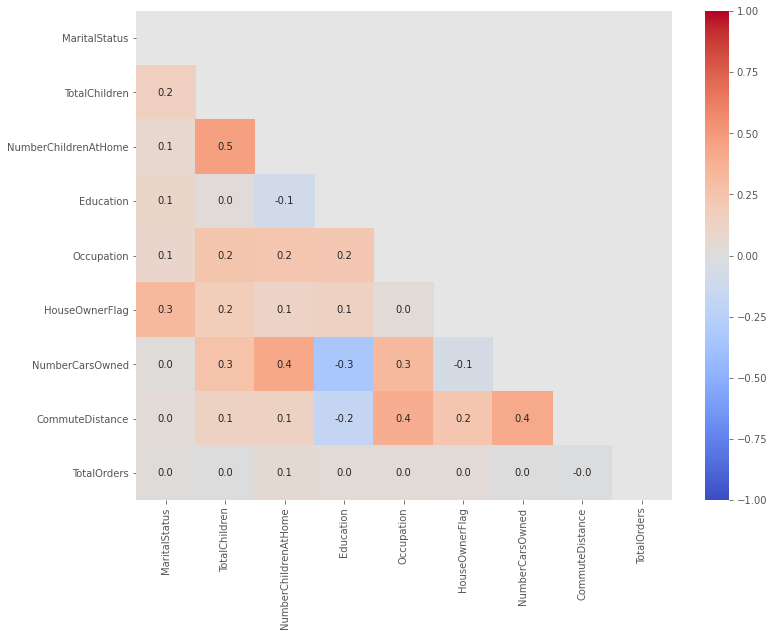

In [ ]:
# Generate correlation matrix heat map
corrmatrix = adWork[['MaritalStatus', 'TotalChildren', 'NumberChildrenAtHome', 'Education', 'Occupation', 'HouseOwnerFlag', 'NumberCarsOwned', 'CommuteDistance', 'TotalOrders']]

matrix = np.triu(corrmatrix.corr())

plt.figure(figsize=(12, 9))
sns.heatmap(corrmatrix.corr(), annot=True, fmt='.1f', vmin=-1, vmax=1, center=0, cmap='coolwarm', mask=matrix)

In [ ]:
adWork.columns

Index(['Country', 'MaritalStatus', 'Age', 'Gender', 'YearlyIncome',
       'TotalChildren', 'NumberChildrenAtHome', 'Education', 'Occupation',
       'HouseOwnerFlag', 'NumberCarsOwned', 'VariousPurchaseFlag',
       'AmountOrdersGroup', 'CommuteDistance', 'TotalOrders',
       'TotalSalesAmount'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
## Features
features_full = adWork[['Country', 'MaritalStatus', 'Age', 'Gender', 'TotalChildren', 'YearlyIncome', 'NumberChildrenAtHome', 'Education', 'Occupation', 'HouseOwnerFlag', 'NumberCarsOwned', 'CommuteDistance', 'TotalOrders']].values
features_v1 = adWork[['MaritalStatus', 'Gender', 'TotalChildren', 'NumberChildrenAtHome', 'Education', 'Occupation', 'HouseOwnerFlag', 'NumberCarsOwned', 'CommuteDistance', 'TotalOrders']].values
features_v2 = adWork[['Country', 'MaritalStatus', 'TotalChildren', 'Education', 'Occupation', 'HouseOwnerFlag', 'NumberCarsOwned', 'CommuteDistance', 'TotalOrders']].values

In [ ]:
## Classification labels
labels = adWork_Raw['VariousPurchaseFlag'].values

In [ ]:
## Regression labels
labels = adWork_Raw['TotalSalesAmount'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features_v2, labels, test_size=0.3, random_state=8)

In [ ]:
print('Training Set: {} rows, \nTest Set: {} rows'.format(X_train.shape[0], X_test.shape[0]))

Training Set: 12938 rows, 
Test Set: 5546 rows


In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
## Full names
names_full = adWork[['Country', 'MaritalStatus', 'Age', 'Gender', 'TotalChildren', 'YearlyIncome', 'NumberChildrenAtHome', 'Education', 'Occupation', 'HouseOwnerFlag', 'NumberCarsOwned', 'CommuteDistance', 'TotalOrders']].columns
names_v1 = adWork[['MaritalStatus', 'Gender', 'TotalChildren', 'NumberChildrenAtHome', 'Education', 'Occupation', 'HouseOwnerFlag', 'NumberCarsOwned', 'CommuteDistance', 'TotalOrders']].columns
names_v2 = adWork[['Country', 'MaritalStatus', 'TotalChildren', 'Education', 'Occupation', 'HouseOwnerFlag', 'NumberCarsOwned', 'CommuteDistance', 'TotalOrders']].columns

In [ ]:
lasso = Lasso(alpha=0.1)

In [ ]:
lasso_coef = lasso.fit(features_v2, labels).coef_

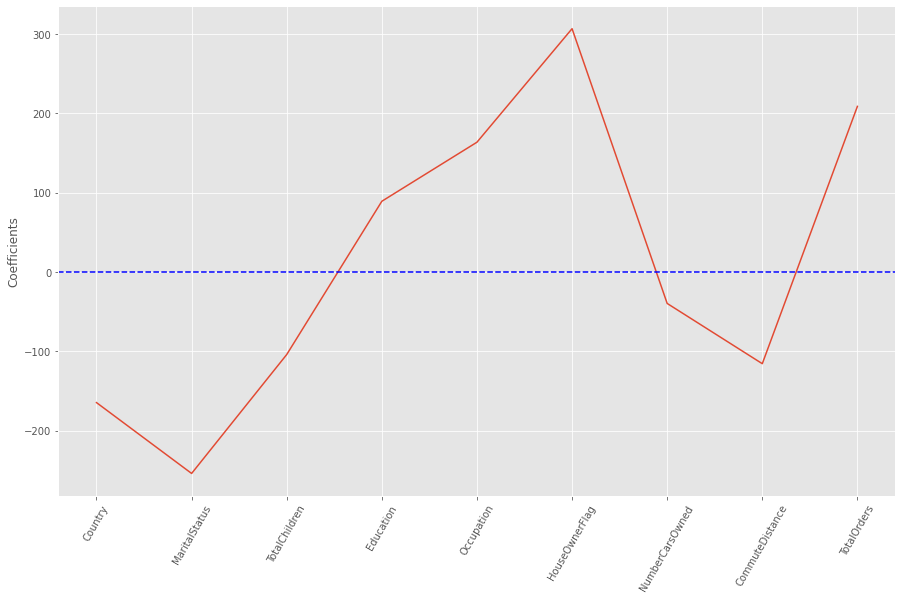

In [ ]:
plt.figure(figsize=(15,9))

plt.plot(range(len(names_v2)), lasso_coef)
plt.xticks(range(len(names_v2)), names_v2, rotation=60)
plt.axhline(y=0, linestyle="--", c="b")
plt.ylabel('Coefficients')

plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=8)

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
knn.score(X_test, y_test)

0.8250991705733862

In [ ]:
neighbors = np.arange(1, 15)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [ ]:
for i, k in enumerate(neighbors):

    knn = KNeighborsClassifier(n_neighbors=k)

    knn.fit(X_train, y_train)

    train_accuracy[i] = knn.score(X_train, y_train)

    test_accuracy[i] = knn.score(X_test, y_test)

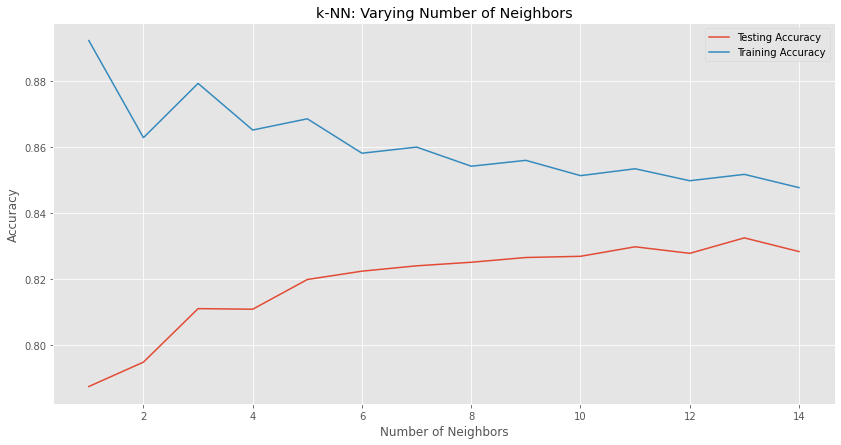

In [ ]:
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
print(y_test[:35], '\n', y_pred[:35])

[0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 1 1 0 1 1 0 1 0 0 1 0] 
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0]


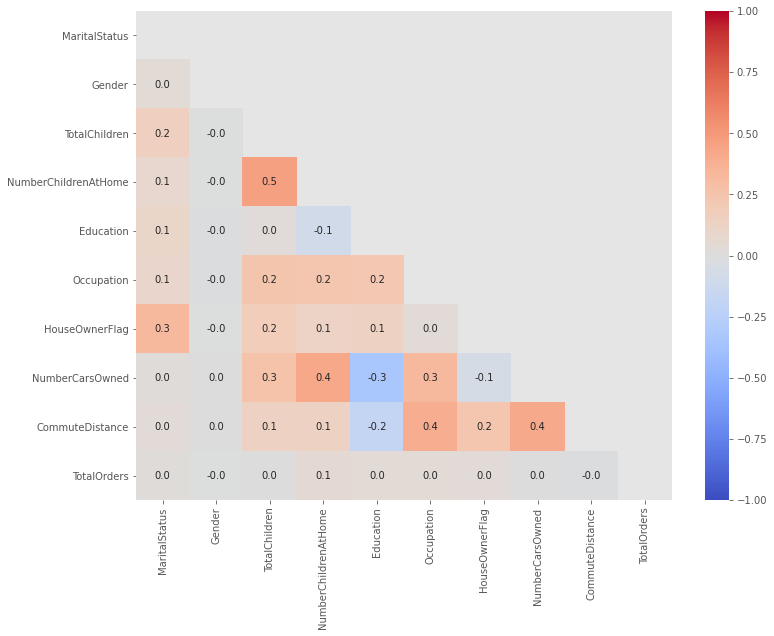

In [ ]:
# Generate correlation matrix heat map
corrfe = adWork_Raw[['MaritalStatus', 'Gender', 'TotalChildren', 'NumberChildrenAtHome', 'Education', 'Occupation', 'HouseOwnerFlag', 'NumberCarsOwned', 'CommuteDistance', 'TotalOrders']]

matrix = np.triu(corrfe.corr())

plt.figure(figsize=(12, 9))
sns.heatmap(corrfe.corr(), annot=True, fmt='.1f', vmin=-1, vmax=1, center=0, cmap='coolwarm', mask=matrix)

In [ ]:
features

array([[ 1,  2,  0, ...,  0,  1,  8],
       [ 0,  3,  3, ...,  1,  0, 11],
       [ 1,  3,  3, ...,  0,  2,  4],
       ...,
       [ 0,  3,  0, ...,  0,  0,  1],
       [ 1,  3,  0, ...,  0,  0,  1],
       [ 1,  0,  0, ...,  0,  0,  1]])